In [1029]:
from chxanalys.chx_packages import *
%matplotlib notebook
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })
import pickle as cpk
from chxanalys.chx_xpcs_xsvs_jupyter_V1 import *

In [847]:
scat_geometry ='saxs'
qphi_analysis = False
run_t_ROI_Inten = True
use_sqnorm = True
use_imgsum_norm = True
run_one_time = True
bad_frame_list = None
good_start = 0
fit_g2_func = 'stretched'

run_two_time =   True    #run  two-time
run_four_time = False #True #False   #run  four-time
run_xsvs=  False #False         #run visibility analysis
att_pdf_report = True    #attach the pdf report to CHX olog
qth_interest = 1 #the intested single qth             
use_sqnorm = True    #if True, use sq to normalize intensity
use_imgsum_norm= True  #if True use imgsum to normalize intensity for one-time calculatoin
pdf_version='_%s'%get_today_date()     #for pdf report name
run_dose = True #False #True  #run dose_depend analysis

if scat_geometry == 'gi_saxs':run_xsvs= False;use_sqnorm=False
if scat_geometry == 'gi_waxs':use_sqnorm = False;
if scat_geometry != 'saxs':qphi_analysis = False;scat_geometry_ = scat_geometry  
else:scat_geometry_ = ['','ang_'][qphi_analysis]+ scat_geometry


In [475]:
#Sample info

T= True
F = False


#chx_THL230_15s_11_W0028_H11-171113-172644-1.csv
#--> count : 1 ['8452c7'] (scan num: 9195) (Measurement: Timpix3 1s series file chx_THL230_11s_10: exp_1s Silica 250 nm diam, stock solution in water )
    
sam = dict(  
run11 =  'chx_THL230_15s_11_W0028_H11-171113-172644-1.csv',
mask  =  'W0028_H11_trimdacs.txt'
    
)    

#save_dict_csv(sam, out_dir0 + 'sample_info.csv')

data_dir = '/XF11ID/analysis/2017_3/Timepix/Data/'
out_dir0 = '/XF11ID/analysis/2017_3/Timepix/Results/'

In [3]:
cd /XF11ID/analysis/2017_3/Timepix/Data/

/XF11ID/analysis/2017_3/Timepix/Data


In [4]:
ls

chx_THL230_15s_11_W0028_H11-171113-172644-1.csv
chx_THL230_15s_16_W0028_H11-171114-041148-1.csv
chx_THL230_300s_12_W0028_H11-171114-005224.csv
chx_THL230_300s_13_W0028_H11-171114-015054.csv
chx_THL230_300s_15_W0028_H11-171114-031958.csv
chx_THL230_3600s_20_W0028_H11-171114-063246.csv
chx_THL230_420s_19_W0028_H11-171114-055948-1.csv
chx_THL230_600s_17_W0028_H11-171114-054448.csv
chx_THL230_600s_18_W0028_H11-171114-055707.csv
data_12.zip
data_13.zip
data_15.zip
data_16.zip
data_17.zip
data_20.zip
W0028_H11_trimdacs.txt


In [5]:
#sam

In [6]:
from chxanalys.chx_packages import *
%matplotlib notebook
plt.rcParams.update({'figure.max_open_warning': 0})
#%reset -f  #for clean up things in the memory
import pandas as pds

/opt/conda_envs/analysis/lib/python3.5/site-packages/filestore/retrieve.py:15: UserWarning: Do not import filestore.retrieve, import filestore.api instead
  warnings.warn("Do not import filestore.retrieve, "
/opt/conda_envs/analysis/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Provide sample filename here

In [7]:
run = '11'
thresh = 230
uid = 'run%s'%run
fp = sam[ uid ]
print( uid, fp  ) 

out_dir = os.path.join(out_dir0, '%s/'%uid)
os.makedirs(out_dir, exist_ok=True)
print('Results from this analysis will be stashed in the directory %s' %out_dir)
uidstr = 'uid=%s'%uid

run11 chx_THL230_15s_11_W0028_H11-171113-172644-1.csv
Results from this analysis will be stashed in the directory /XF11ID/analysis/2017_3/Timepix/Results/run11/


# Get Data

In [103]:
%run /XF11ID/analysis/Analysis_Pipelines/Develop/chxanalys/chxanalys/xpcs_timepixel.py

In [44]:
time_unit = 25/4096/1e9#  * this time_unit to make scale in s
print(time_unit)


6.103515625e-12
The time duration is 14.8349727469 s.


In [104]:
x,y,t = get_timepixel_data( data_dir, fp,time_unit=time_unit )
#print( 'The max time is %s ms' %( t.max()*6.1/1e9) )

In [46]:
len(t)

13408638

In [107]:
print( 'The time duration is %s s.' %t.max()  )

The time duration is 14.8349727469 s.


In [13]:
#plot1D(t)

In [ ]:
#Due to shutter open chose data from 100 to -100

In [108]:
if False:
    x = x[100:-100]
    y = y[100:-100]
    t = t[100:-100]

# Get Time~Intensity Plot

In [292]:
tbin_step = 0.01 * 1  #in unit of s
times, imgsum = get_his_taus( t, bin_step = tbin_step )
#times in ms
print(times.shape) 
timeperframe =  tbin_step 
print ( timeperframe)

(1483,)
0.01


In [293]:
plot1D( x = times, y= imgsum , m='o', c='b', ls = '--',save=True, path= out_dir,
     title='%s_imgsum_time'%uid, xlabel = r"$time $ $(s)$", ylabel = 'Photon Counts of Image Sum' ) 

<IPython.core.display.Javascript object>

In [115]:
%run /XF11ID/analysis/Analysis_Pipelines/Develop/chxanalys/chxanalys/chx_generic_functions.py

In [294]:
thres = 1.2e4
w= np.where( imgsum >thres )
t1,t2= times[ w[0][0] ], times[ w[0][-1] ]
t1_ind, t2_ind =  find_index(t,t1), find_index(t,t2)
print( t1,t2, t1_ind, t2_ind  )

4.1 5.11 114190 13406713


# Get interested time range

In [290]:
#t1_ind, t2_ind = 0, 1000

In [295]:
xeff = x[t1_ind:t2_ind] 
yeff = y[t1_ind:t2_ind] 
teff = t[t1_ind:t2_ind] - t[t1_ind]


(100,)
0.01


<IPython.core.display.Javascript object>


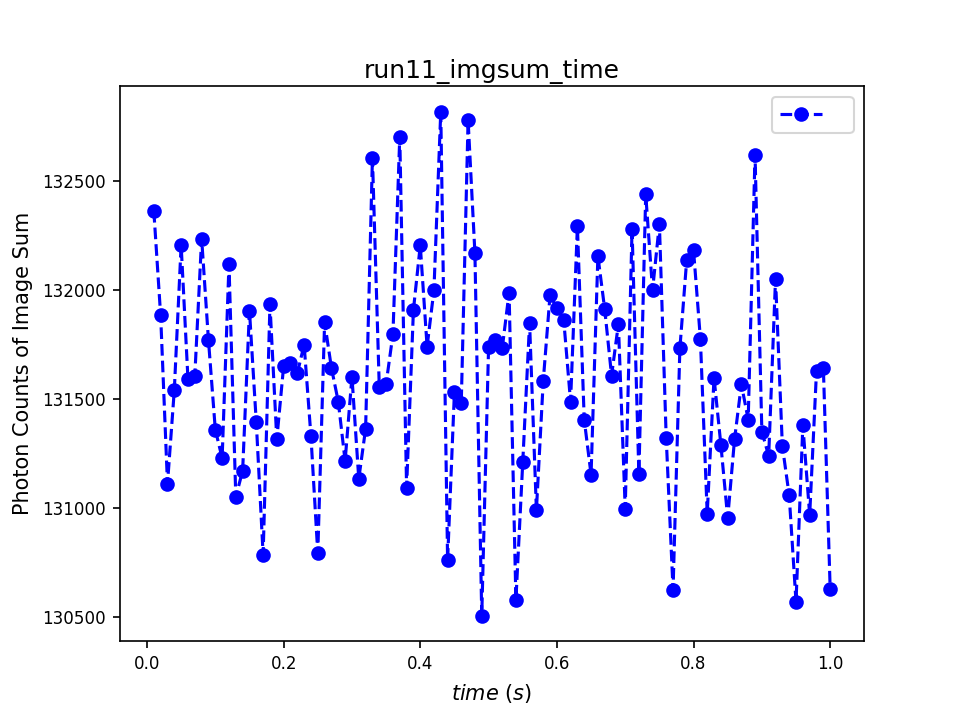

In [792]:
tbin_step = 0.01 * 1  #in unit of s
times, imgsum = get_his_taus( teff, bin_step = tbin_step )
#times in ms
print(times.shape) 
timeperframe =  tbin_step 
print ( timeperframe)

plot1D( x = times, y= imgsum , m='o', c='b', ls = '--',save=True, path= out_dir,
     title='%s_imgsum_time'%uid, xlabel = r"$time $ $(s)$", ylabel = 'Photon Counts of Image Sum' ) 

# Get/Create Mask

In [476]:
m = np.loadtxt( data_dir + sam['mask'])

In [477]:
#mask = np.zeros( [256, 256] )
mask = 1 - m[:,3].reshape( [256, 256 ])

In [478]:
edg = 2
mask[:edg,:] = 0
mask[-edg:,:] = 0
mask[:,:edg] = 0
mask[:,-edg:] = 0

<IPython.core.display.Javascript object>


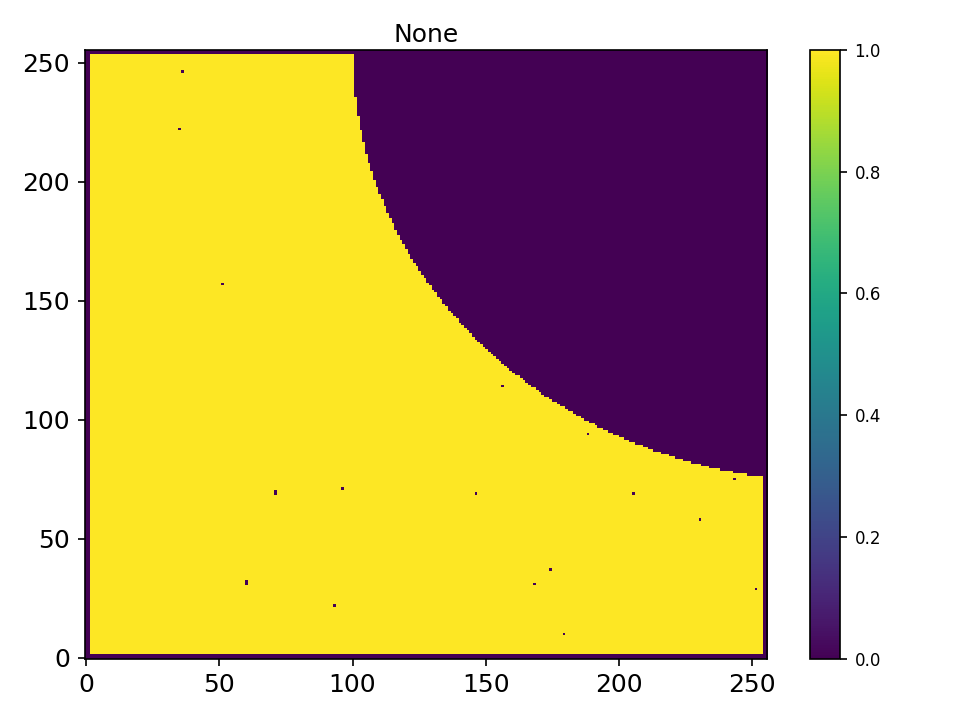

In [479]:
show_img( mask )

In [51]:
%run /XF11ID/analysis/Analysis_Pipelines/Develop/chxanalys/chxanalys/xpcs_timepixel.py

# Get Averaged Image

In [481]:
avg_img = get_timepixel_avg_image( xeff,yeff,teff,  delta_time = None ) * mask

The max photon count is 1740.


<IPython.core.display.Javascript object>


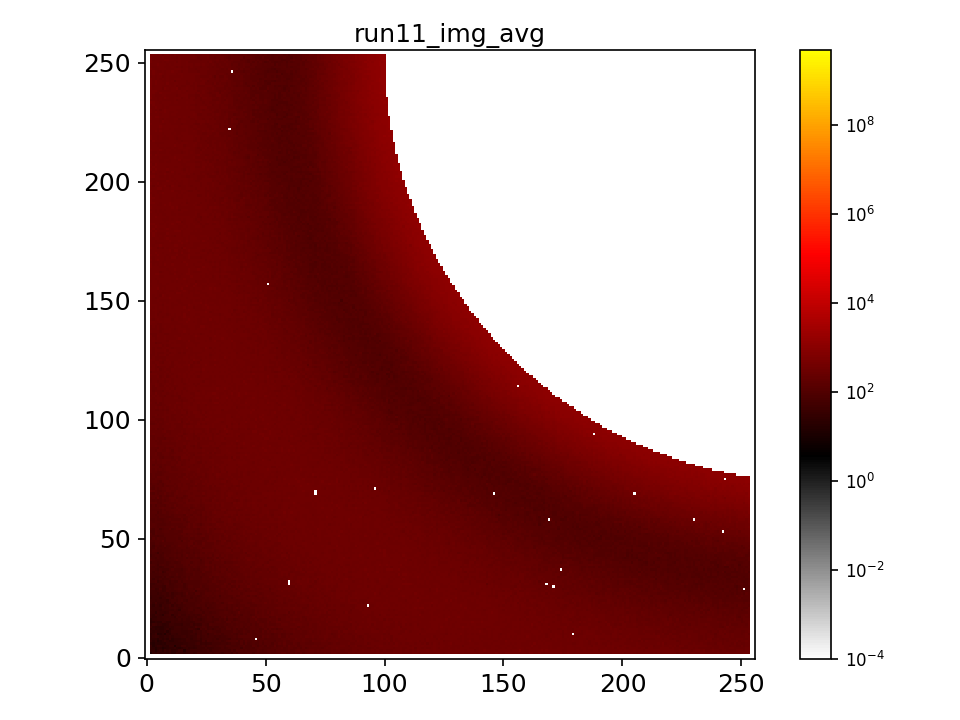

/opt/conda_envs/analysis/lib/python3.5/site-packages/matplotlib/colorbar.py:821: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  y[self._inside] = norm(yi)


In [482]:
show_img( avg_img,  alpha=0.8, vmin=0.0001, vmax= 5e9, logs=True, aspect=1,  
          
         image_name= '%s_img_avg'%uid,  save=True, path= out_dir,  cmap = cmap_albula )

# Get better center position
### center0 is the image x, center1 is the image y

In [662]:
cx0, cy0 = [280, 254 +2  ]  #cx0 is the image y, cy0 is the image x
center=[cy0,cx0]  #center0 is the image x, center1 is the image y

In [450]:
Nr = 10
r1ds = np.zeros([ (2*Nr+1)**2, 4])
i=0
for cx_ in range(-Nr, Nr+1):
    for cy_ in range(-Nr, Nr+1):
        cx, cy = [cx0 - cx_  , cy0 - cy_   ]
        center=[cy,cx]
        rmk = create_ring_mask( [256, 256],  282, 292, center= center ) * mask
        r1d = avg_img[np.array(rmk, dtype=bool) ].ravel()
        r1ds[i] = [ r1d.mean(), r1d.std(), cx, cy ]
        #print( cx, cy, r1d.mean(), r1d.std()  )
        i +=1
        #plot1D(  r1d, c='b', m='o', title='cx=%s, cy=%s'%(cx,cy)  )
        #print(i, )

In [451]:
c1,c2 = np.argmax( r1ds[:,0] ), np.argmin( r1ds[:,1] )
print(c1,c2)

179 57


In [452]:
r1ds[c1], r1ds[c2]

(array([ 348.18295638,   22.36420267,  261.        ,  283.        ]),
 array([ 347.0943473 ,   21.92235653,  267.        ,  279.        ]))

In [457]:
center = r1ds[c1][2:]
print(center)

[ 261.  283.]


In [663]:
center = [ 256, 280 ] #center0 is the image x, center1 is the image y  #actually this is good!

In [498]:
rmk = create_ring_mask( [256, 256],  282, 292, center= center ) * mask
r1d = avg_img[np.array(rmk, dtype=bool) ].ravel()
plot1D(  r1d, c='b', m='o'  )

<IPython.core.display.Javascript object>

In [809]:
avg_img = get_timepixel_avg_image( xeff,yeff,teff,  delta_time = None )  

The max photon count is 1740.


In [813]:
get_timepixel_avg_image??

<IPython.core.display.Javascript object>


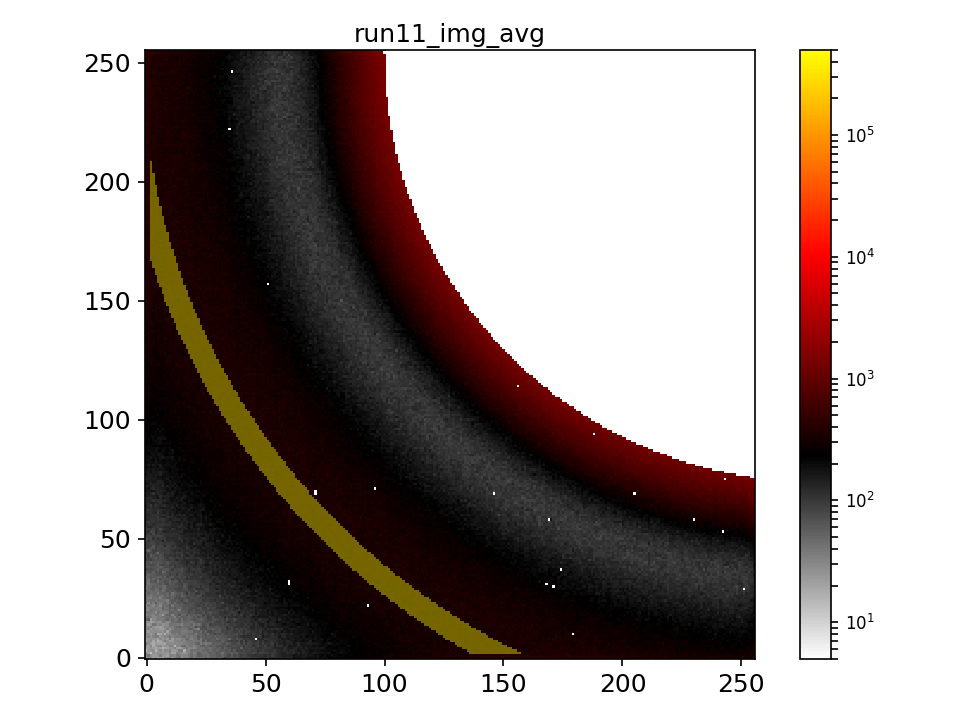

/opt/conda_envs/analysis/lib/python3.5/site-packages/matplotlib/colorbar.py:821: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  y[self._inside] = norm(yi)


In [810]:
show_img( avg_img, label_array = rmk, alpha=0.4, vmin=5, vmax= 5e5, logs=True, aspect=1, center= center[::-1],           
         image_name= '%s_img_avg'%uid,  save=True, path= out_dir,  cmap = cmap_albula )

<IPython.core.display.Javascript object>


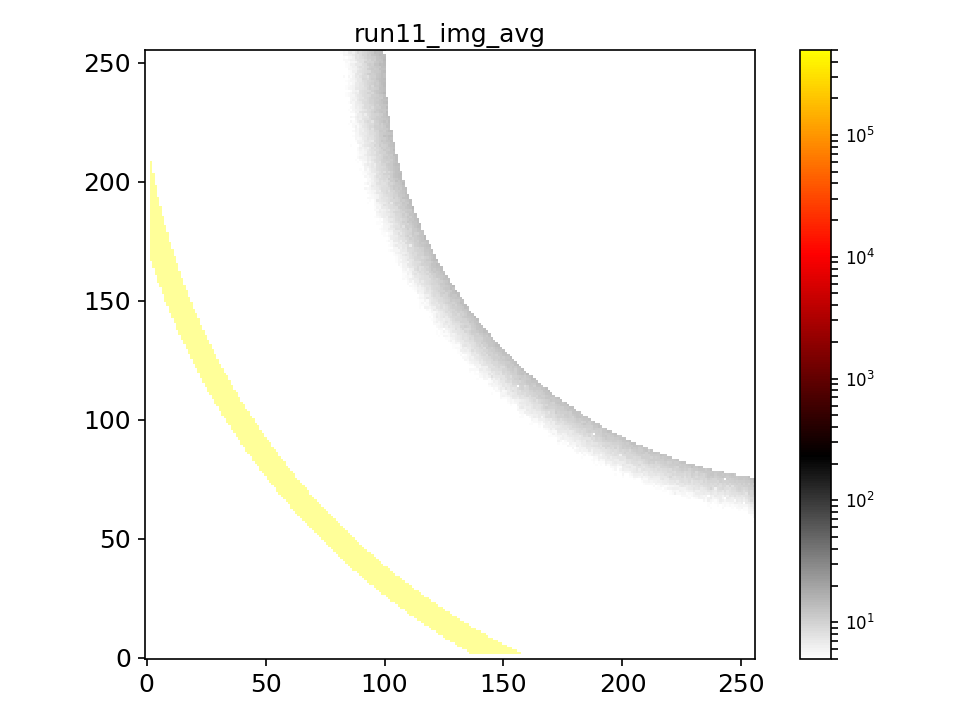

/opt/conda_envs/analysis/lib/python3.5/site-packages/matplotlib/colorbar.py:821: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  y[self._inside] = norm(yi)


In [819]:
show_img( avg_img2, label_array = rmk, alpha=0.4, vmin=5, vmax= 5e5, logs=True, aspect=1, center= center[::-1],           
         image_name= '%s_img_avg'%uid,  save=True, path= out_dir,  cmap = cmap_albula )

/opt/conda_envs/analysis/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


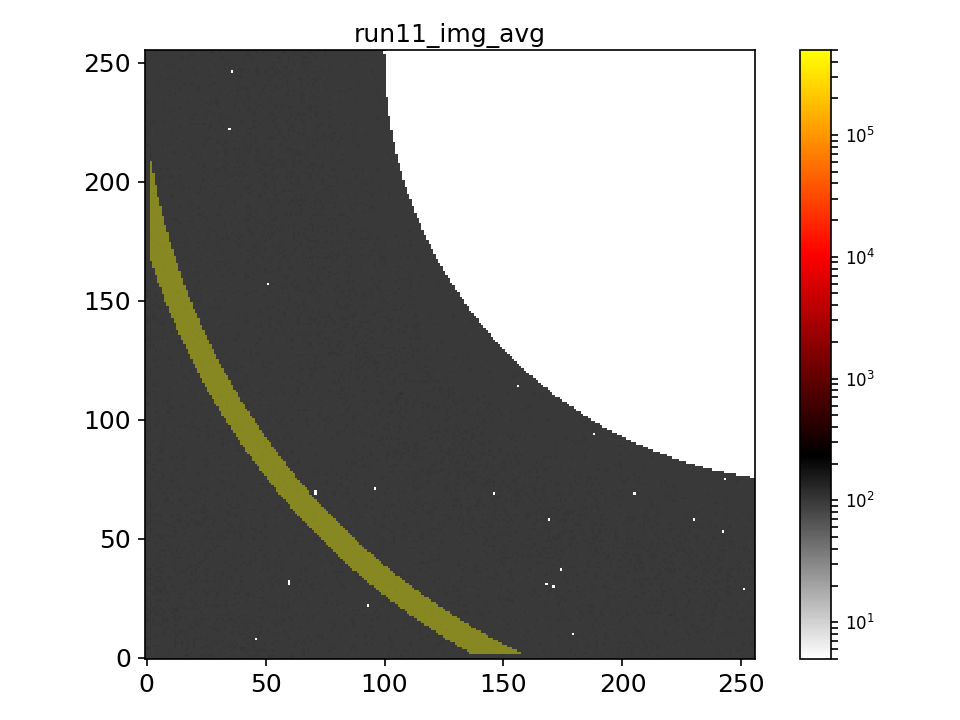

/opt/conda_envs/analysis/lib/python3.5/site-packages/matplotlib/colorbar.py:821: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  y[self._inside] = norm(yi)
/opt/conda_envs/analysis/lib/python3.5/site-packages/matplotlib/colors.py:921: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


In [820]:
show_img( avg_img/avg_img2, label_array = rmk, alpha=0.4, vmin=5, vmax= 5e5, logs=True, aspect=1, center= center[::-1],           
         image_name= '%s_img_avg'%uid,  save=True, path= out_dir,  cmap = cmap_albula )

# Do a circular average

In [664]:
center

[256, 280]

In [738]:
setup_pargs = {'Ldet': 16035 + 0,  'center': center,
               'dpix': 0.046,  #what's pixel size, should be 45 um???
               'exposuretime':  0.001, 'lambda_': 1.28481,
            'path': out_dir,  
               'uid': 'uid=Run11'}

In [778]:
avg_img_ = FD.rdframe(0) * mask

In [914]:
avg_img_ =  get_avg_imgc(FD,sampling=1)

Averaging 10099 images: 100%|██████████| 10099/10099 [00:02<00:00, 4342.85it/s]


<IPython.core.display.Javascript object>


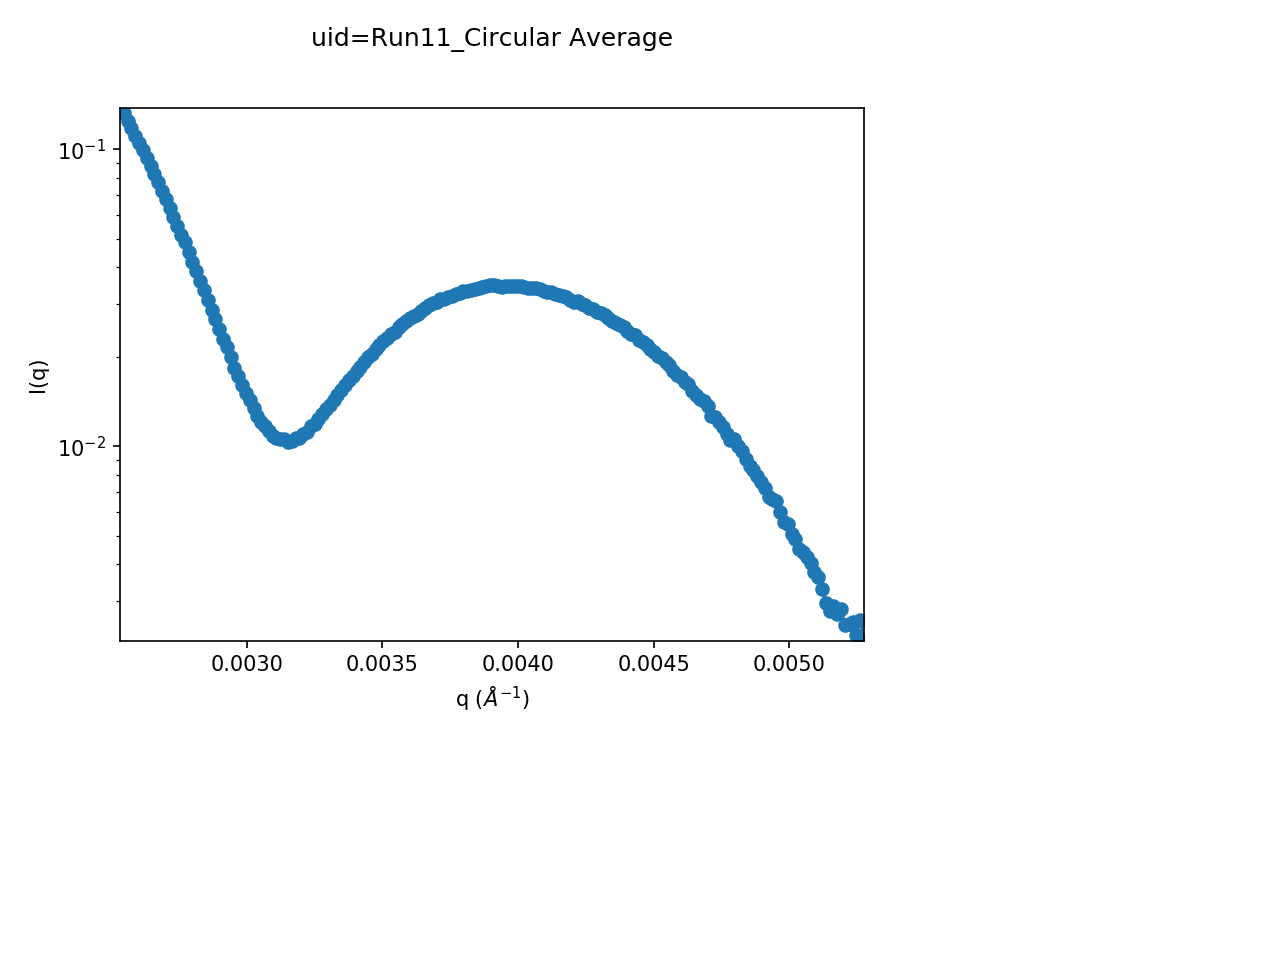

In [916]:
qp_saxs, iq_saxs, q_saxs = get_circular_average( avg_img, mask, pargs=setup_pargs  )
plot_circular_average( qp_saxs, iq_saxs, q_saxs,  pargs=setup_pargs,  
                  xlim=[q_saxs.min(), q_saxs.max()*1.0], ylim = [iq_saxs.min(), iq_saxs.max()] )

In [179]:
data_dir = '/XF11ID/analysis/2017_3/yuzhang/Results/cb9605/'
fuid = 'cb9605fa-b9ea-41fb-afb1-3940ecc0fa84'
extract_dict = extract_xpcs_results_from_h5( filename = 'uid=%s_Res.h5'%fuid, import_dir = data_dir )

In [155]:
extract_dict.keys()

dict_keys(['mean_int_sets', 'qt', 'md', 'taus_uids', 'bad_frame_list', 'qval_dict_v', 'g2_fit_paras', 'q_saxs', 'iq_saxs', 'iqst', 'pixel_mask', 'qval_dict_p', 'imgsum', 'times_roi', 'qval_dict', 'g2_uids', 'mask', 'g2', 'taus', 'roi_mask', 'avg_img'])

<IPython.core.display.Javascript object>


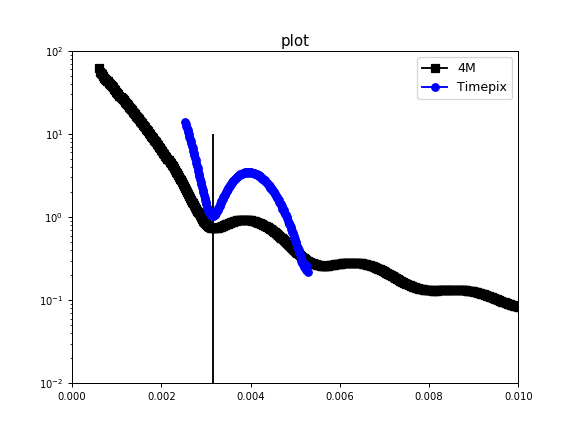

In [1026]:
fig, ax = plt.subplots()
plot1D( x= extract_dict['q_saxs'], y= extract_dict[ 'iq_saxs' ], ax =ax, legend='4M', m='s',c='k' )
plot1D( x=q_saxs, y= iq_saxs * 100, ax =ax, legend='Timepix', m='o',c='b', logy=True, xlim=[0., 0.01], ylim=[0.01,100] )
ax.vlines( 0.00316, 0.,10 )


# Create ring-shaped ROI

In [922]:

if scat_geometry =='saxs':    
    uniformq =  True  #True # False    
    ## Define ROI
    #* Create ring mask defined by  inner_radius, outer_radius, width, num_rings (all in pixel unit)
    #* Create ring mask defined by  edges (all in pixel unit)    
    ### Define a non-uniform distributed rings by giving edges
    if not uniformq:
        
        qcenters = [  0.0023,  0.00365, 0.0050, ]#0.00621, 0.00754, 0.00880  ] #in A-1        
        #width = 0.0001  # in A-1         
        #width =    [0.0001,      0.00012,  0.00014,  0.00016, 0.00018,  0.0002,  0.00022 ]
        width =    np.array( [0.0001,      0.00012,  0.00014,  0.00016, 0.00018,  0.0002,  0.00022 ] ) * 3.5
        
        edges = get_non_uniform_edges(  qcenters, width, number_rings =1 )    
        inner_radius= None
        outer_radius = None
        width = None
        num_rings = None        
    # Define a uniform distributed rings by giving inner_radius, outer_radius, width, num_rings (all in pixel unit)
    if uniformq:            
        inner_radius= 0.0026 #0.006  #16
        outer_radius = 0.0050 #0.05  #112    
        num_rings = 12 #18
        gap_ring_number = 0.1
        width =    ( outer_radius - inner_radius)/(num_rings + gap_ring_number)
        edges = None





In [923]:
if scat_geometry =='saxs':
    roi_mask, qr, qr_edge = get_ring_mask(  mask, inner_radius=inner_radius, 
            outer_radius = outer_radius , width = width, num_rings = num_rings, edges=edges,
                          unit='A',       pargs=setup_pargs   )
    qind, pixelist = roi.extract_label_indices(  roi_mask  ) 
    qr = np.round( qr, 5)
    print(len(qr))
    
    #show_ROI_on_image( avg_img, roi_mask, center, label_on = False, rwidth = 140, alpha=.9,  
    #                 save=True, path=data_dir, uid=uidstr, vmin= np.min(avg_img), vmax= np.max(avg_img),
    #                 aspect=1) 
    qval_dict = get_qval_dict( np.round(qr, 5)  )

12


In [924]:
#show_img(roi_mask * mask)

<IPython.core.display.Javascript object>


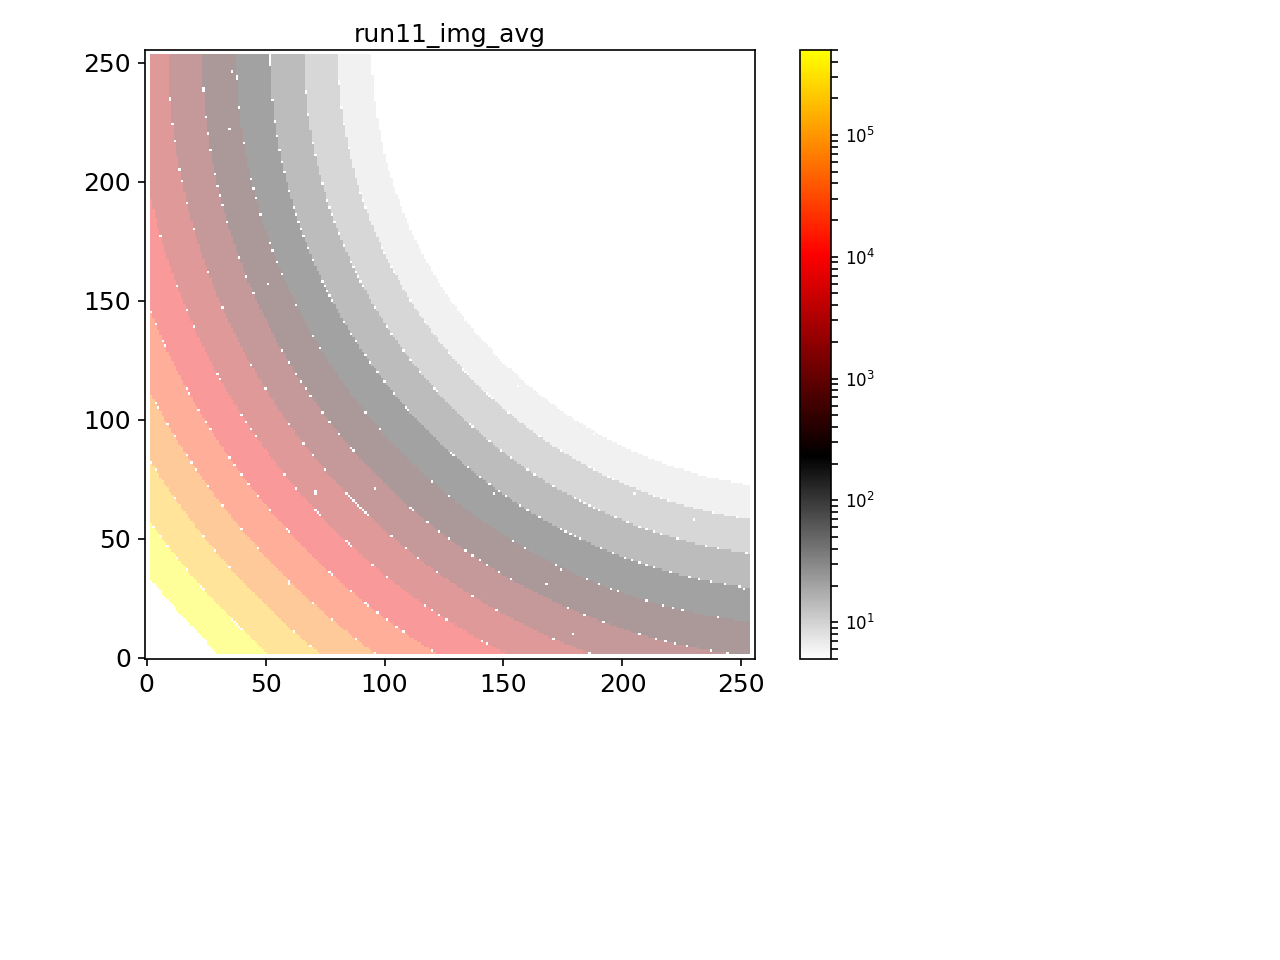

/opt/conda_envs/analysis/lib/python3.5/site-packages/matplotlib/colorbar.py:821: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  y[self._inside] = norm(yi)


In [925]:
show_img( avg_img, label_array = roi_mask, alpha=0.4, vmin=5, vmax= 5e5, logs=True, aspect=1, center= center[::-1],           
         image_name= '%s_img_avg'%uid,  save=True, path= out_dir,  cmap = cmap_albula )

In [909]:
setup_pargs 

{'Ldet': 16035,
 'center': [256, 280],
 'dpix': 0.046,
 'exposuretime': 0.001,
 'lambda_': 1.28481,
 'path': '/XF11ID/analysis/2017_3/Timepix/Results/run11/',
 'uid': 'uid=Run11'}

In [910]:
# plot_qIq_with_ROI??

In [911]:
#show_img( avg_img, label_array = roi_mask, alpha=0.4, vmin=5, vmax= 5e5, logs=True, aspect=1, center= center[::-1],           
#         image_name= '%s_img_avg'%uid,  save=True, path= out_dir,  cmap = cmap_albula )

<IPython.core.display.Javascript object>


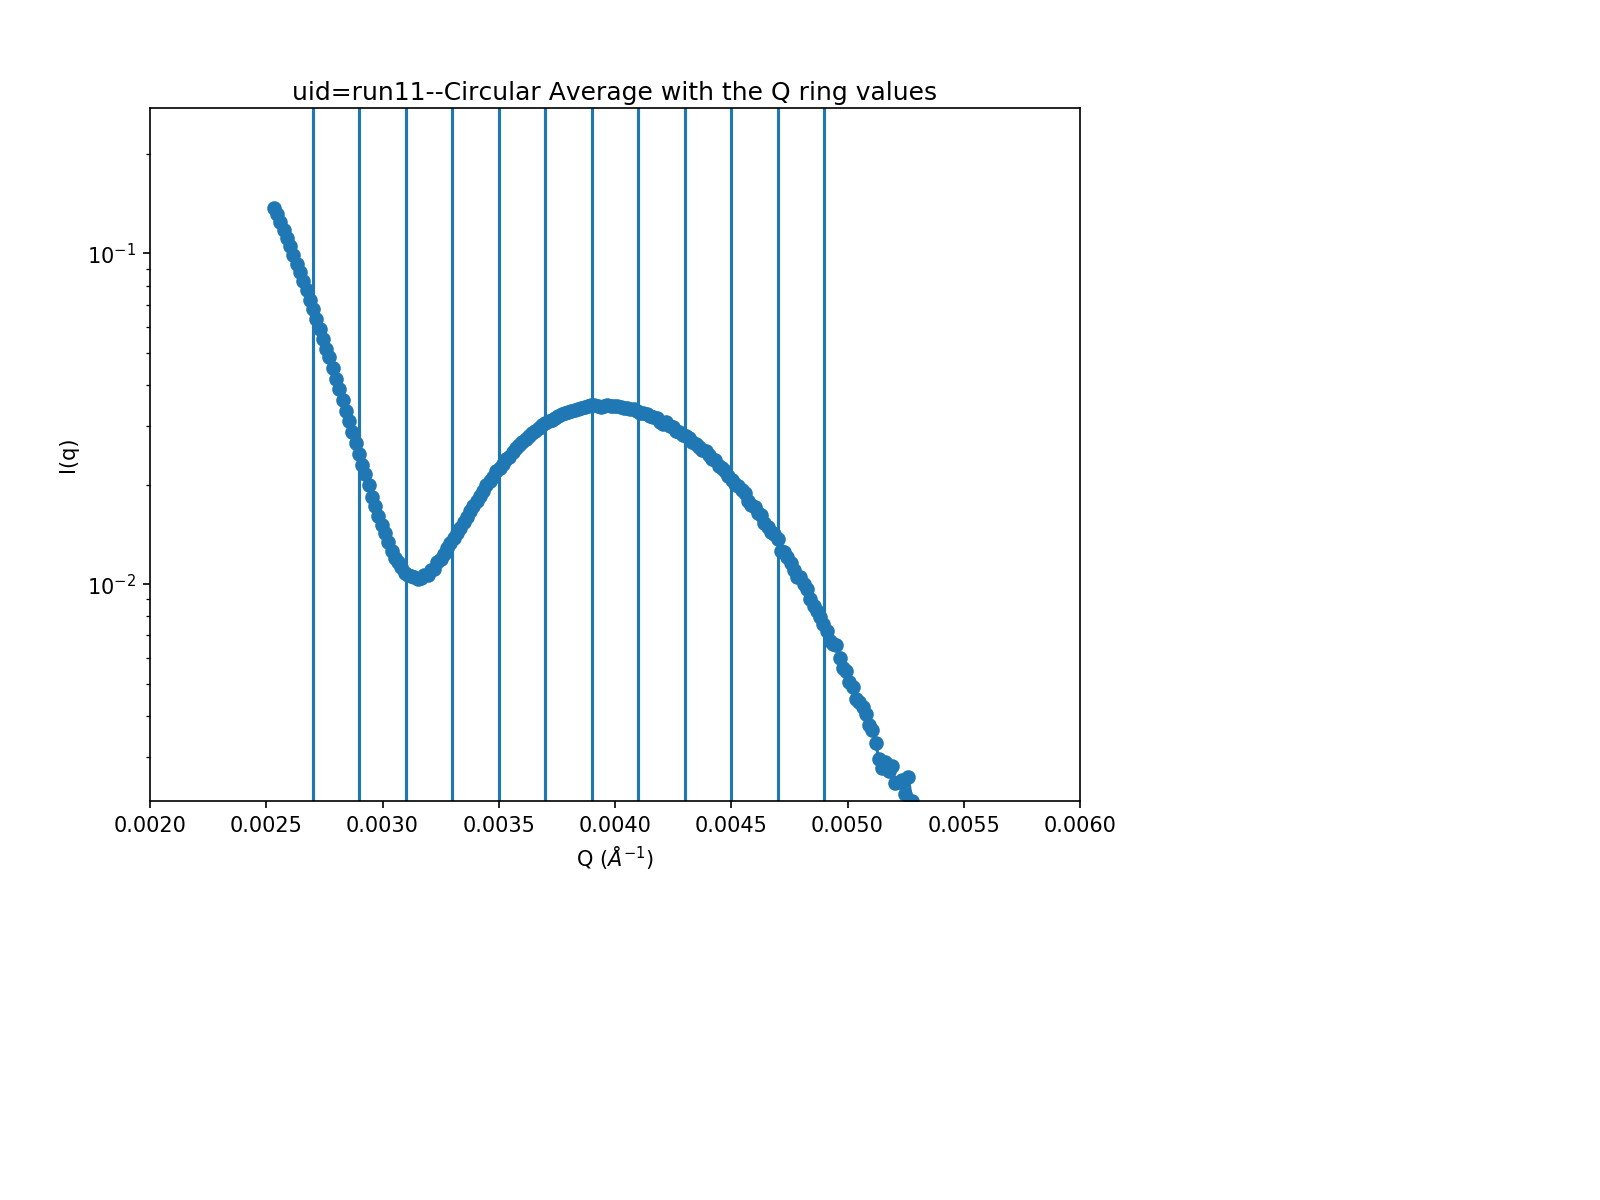

In [926]:
if scat_geometry =='saxs':
    plot_qIq_with_ROI( q_saxs, iq_saxs, qr, logs=True, uid=uidstr, xlim=[0.002,0.006],
                  ylim = [iq_saxs.min(), iq_saxs.max()*2],  save=True, path= out_dir)

# Compress Data

In [528]:
xeff,yeff,teff

(array([ 77,  20, 252, ..., 132, 144, 156]),
 array([225, 234,  77, ...,  46,   3, 118]),
 array([  0.00000000e+00,   1.15625000e-07,   2.29687500e-07, ...,
          1.00999949e+00,   1.00999949e+00,   1.00999951e+00]))

In [814]:
poseff = 256 * xeff + yeff

In [571]:
center

[280, 256]

In [574]:
md = { 'detector_distance': 16035 + 0,
      'beam_center_x': 256,
      'beam_center_y': 280,
       'x_pixel_size': 0.045,
      'y_pixel_size': 0.0045,
      'incident_wavelength': 1.28481,
      'sx': 256,
      'sy':256,
     'frame_time': tbins, 
      'count_time': tbins,
       'uid': 'uid=Run11'
     }

In [575]:
out_dir

'/XF11ID/analysis/2017_3/Timepix/Results/run11/'

In [993]:
tbins = 0.01 #10 ms
tbins = 0.001 #1 ms
tbins = 0.0001 #0.1 ms
tbins = 0.00001  #0.01 ms

In [815]:
%run /XF11ID/analysis/Analysis_Pipelines/Develop/chxanalys/chxanalys/xpcs_timepixel.py

In [ ]:
for tbins in [0.001, 0.0001]:
    pass








In [994]:
filename = out_dir0 + uid + '_tbin=%s.cmp'%tbins
avg_img, imgsum, N = compress_timepix_data( poseff, teff, tbins, filename = filename,  md = md   )
FD = Multifile(filename, 0, N  )

  0%|          | 0/100999 [00:00<?, ?it/s]

Create a new compress file with filename as :/XF11ID/analysis/2017_3/Timepix/Results/run11_tbin=1e-05.cmp.
There are 101000 frames to be compressed...


100%|██████████| 100999/100999 [5:47:07<00:00,  4.68it/s] 


In [899]:
np.max(FD.rdframe(990))

3.0

<IPython.core.display.Javascript object>


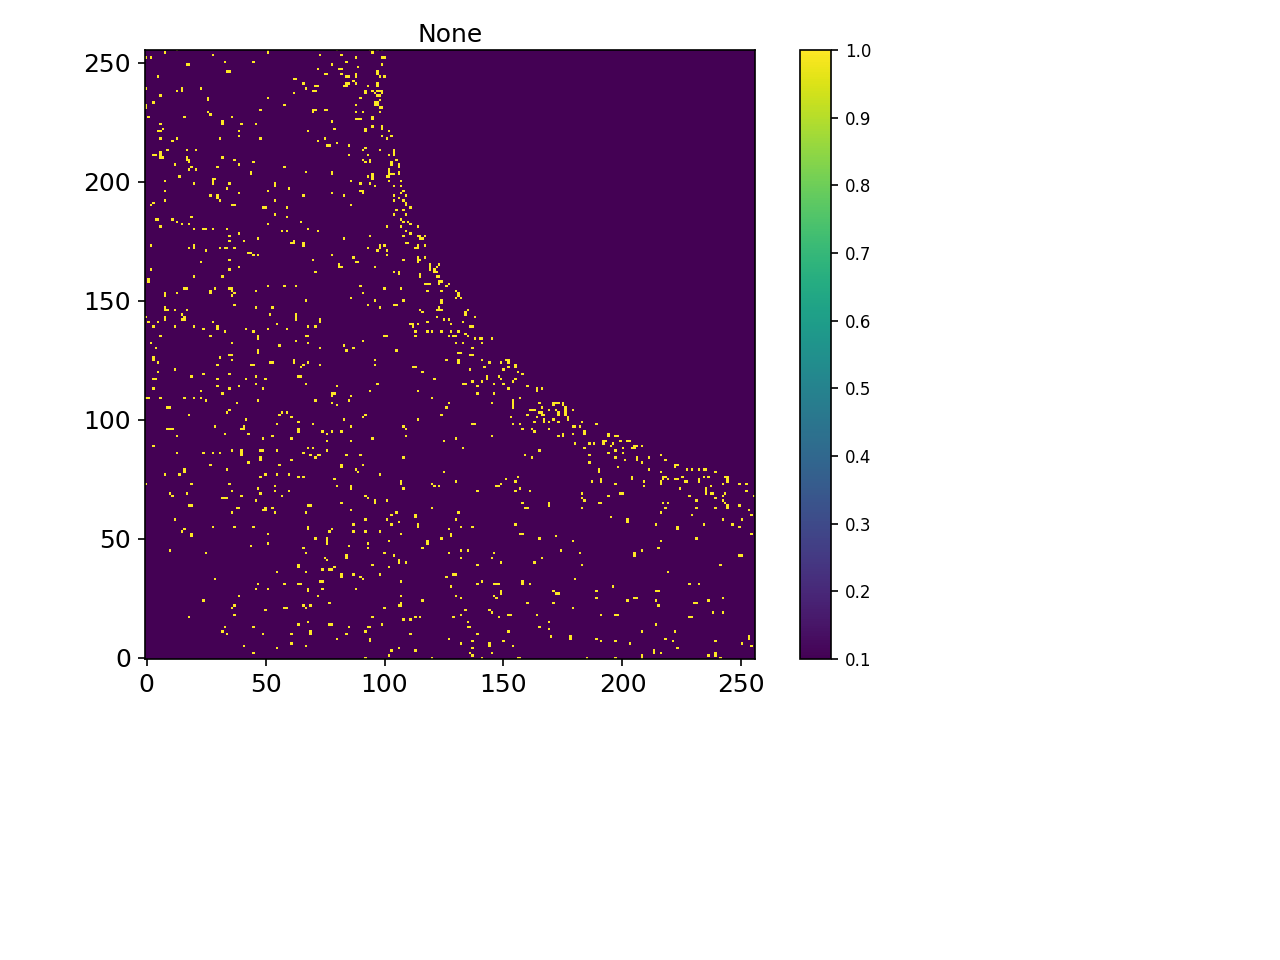

In [902]:
 show_img( FD.rdframe( 990 ),vmin=0.1, vmax= 1, logs= False, aspect=1, )

<IPython.core.display.Javascript object>


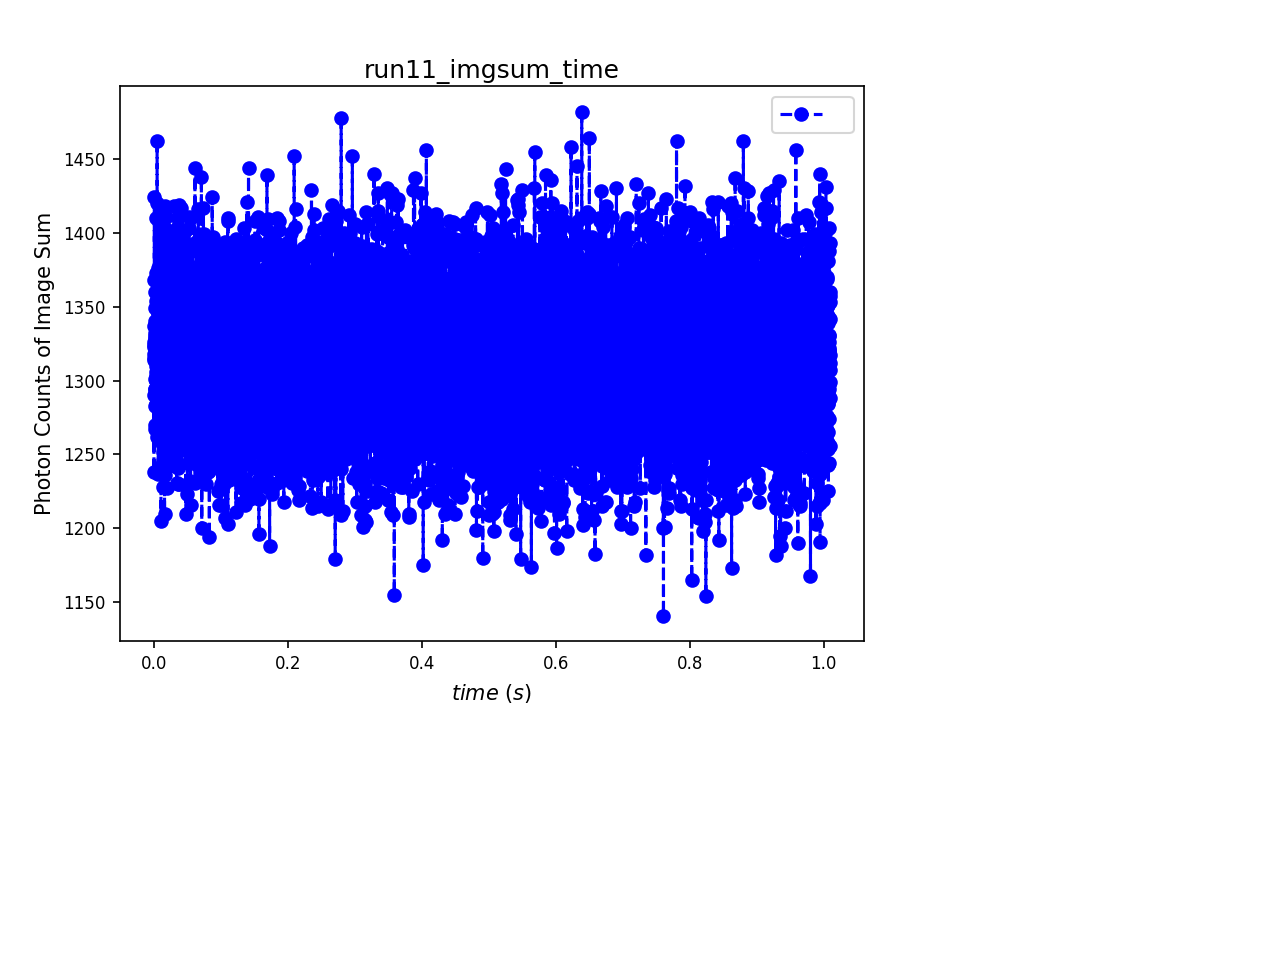

In [889]:
plot1D( x = tbins* np.arange(len(imgsum)), 
       y= imgsum , m='o', c='b', ls = '--',save=True, path= out_dir,
     title='%s_imgsum_time'%uid, xlabel = r"$time $ $(s)$", ylabel = 'Photon Counts of Image Sum' ) 

# Check one ROI intensity

<IPython.core.display.Javascript object>


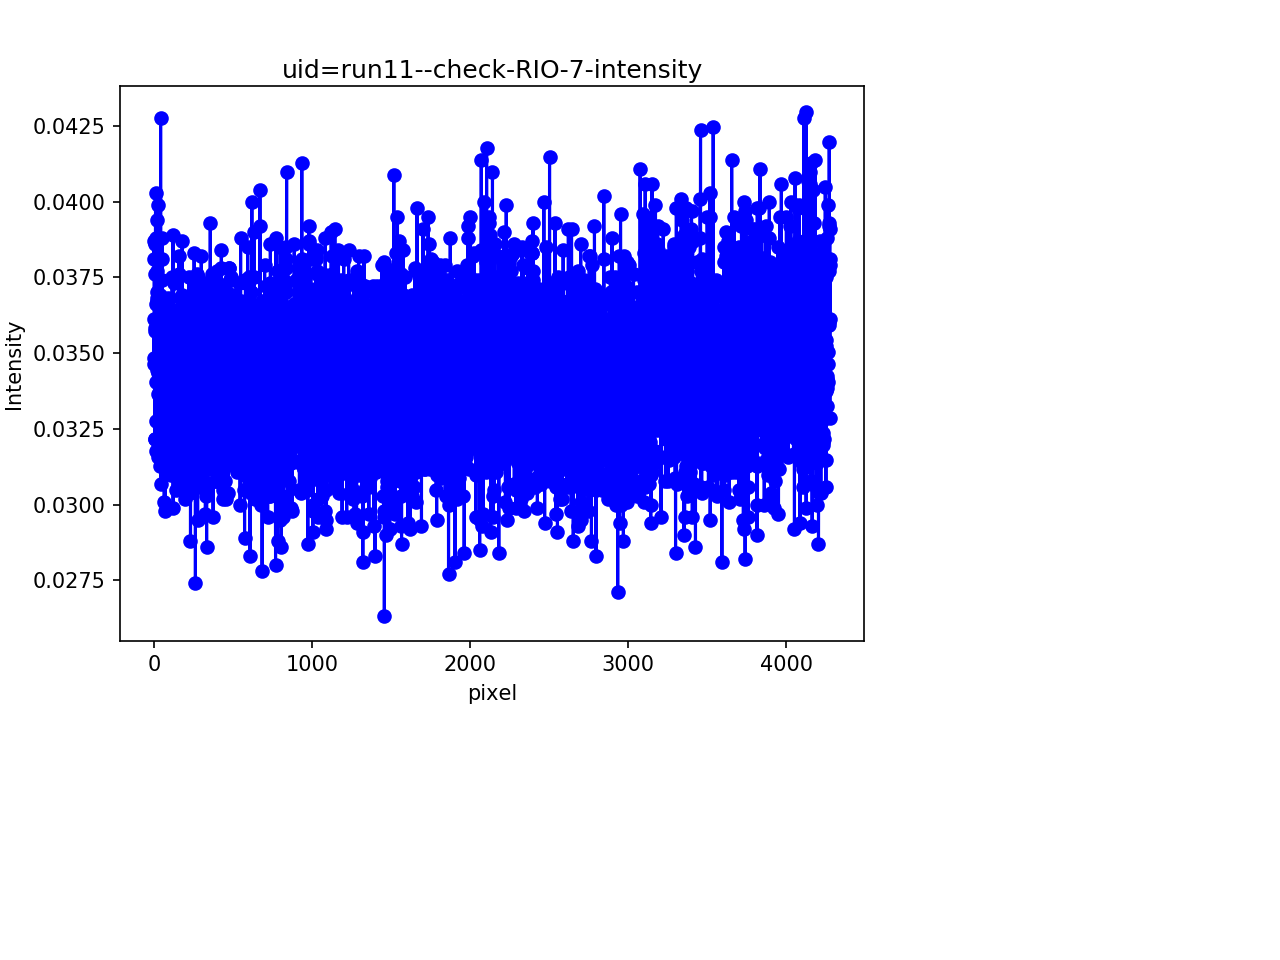

In [927]:
roi_inten = check_ROI_intensity( avg_img, roi_mask, ring_number= 7, uid =uidstr ) #roi starting from 1

# Time Depedent I(q) Analysis

<IPython.core.display.Javascript object>


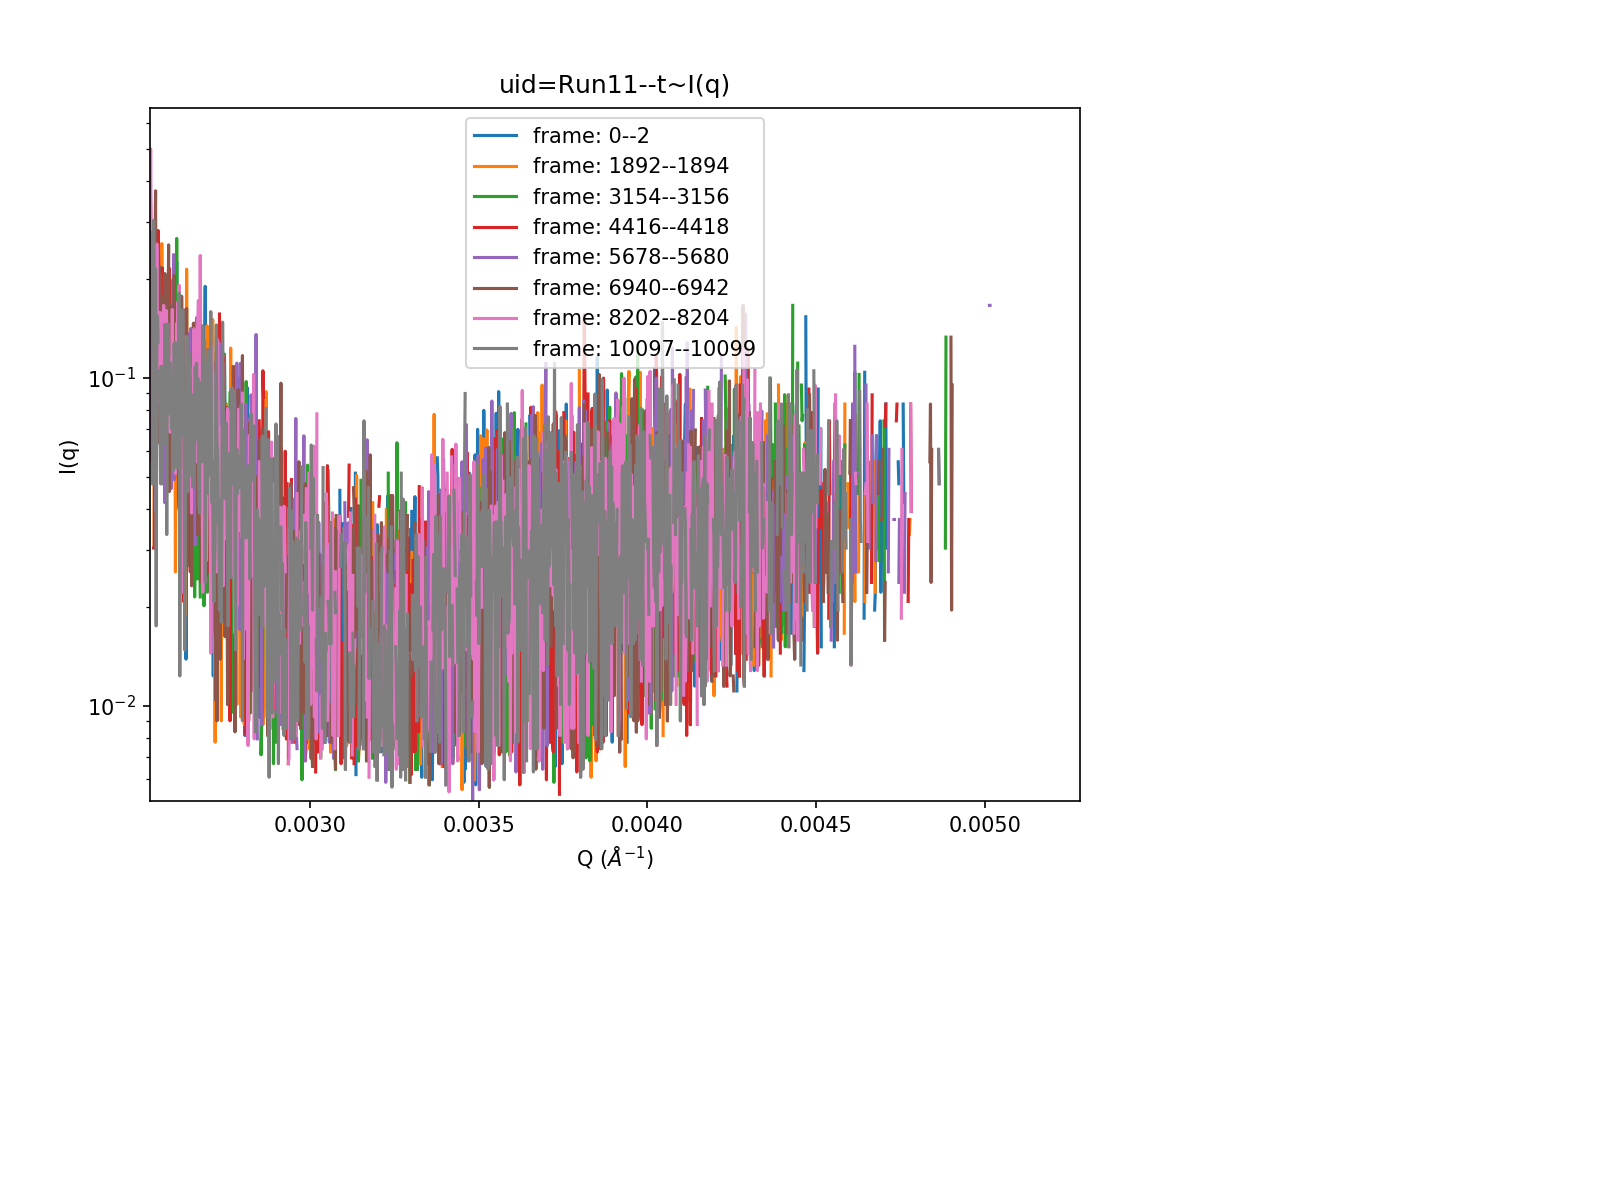

The file: uid=Run11_q_Iqt is saved in /XF11ID/analysis/2017_3/Timepix/Results/run11/


In [887]:
if scat_geometry =='saxs':
    Nimg = FD.end - FD.beg 
    time_edge = create_time_slice( Nimg, slice_num= 8, slice_width= 2, edges = None )
    time_edge =  np.array( time_edge ) + good_start
    #print( time_edge )    
    qpt, iqst, qt = get_t_iqc( FD, time_edge, mask, pargs=setup_pargs, nx=1500, show_progress= False )
    plot_t_iqc( qt, iqst, time_edge, pargs=setup_pargs, xlim=[qt.min(), qt.max()],
           ylim = [iqst.min(), iqst.max()], save=True )

# Do a waterfall analysis

  0%|          | 0/12 [00:00<?, ?it/s]

Starting assign the tasks...
Starting running the tasks...


100%|██████████| 12/12 [00:08<00:00,  1.44it/s]

ROI mean_intensit calculation is DONE!


<IPython.core.display.Javascript object>


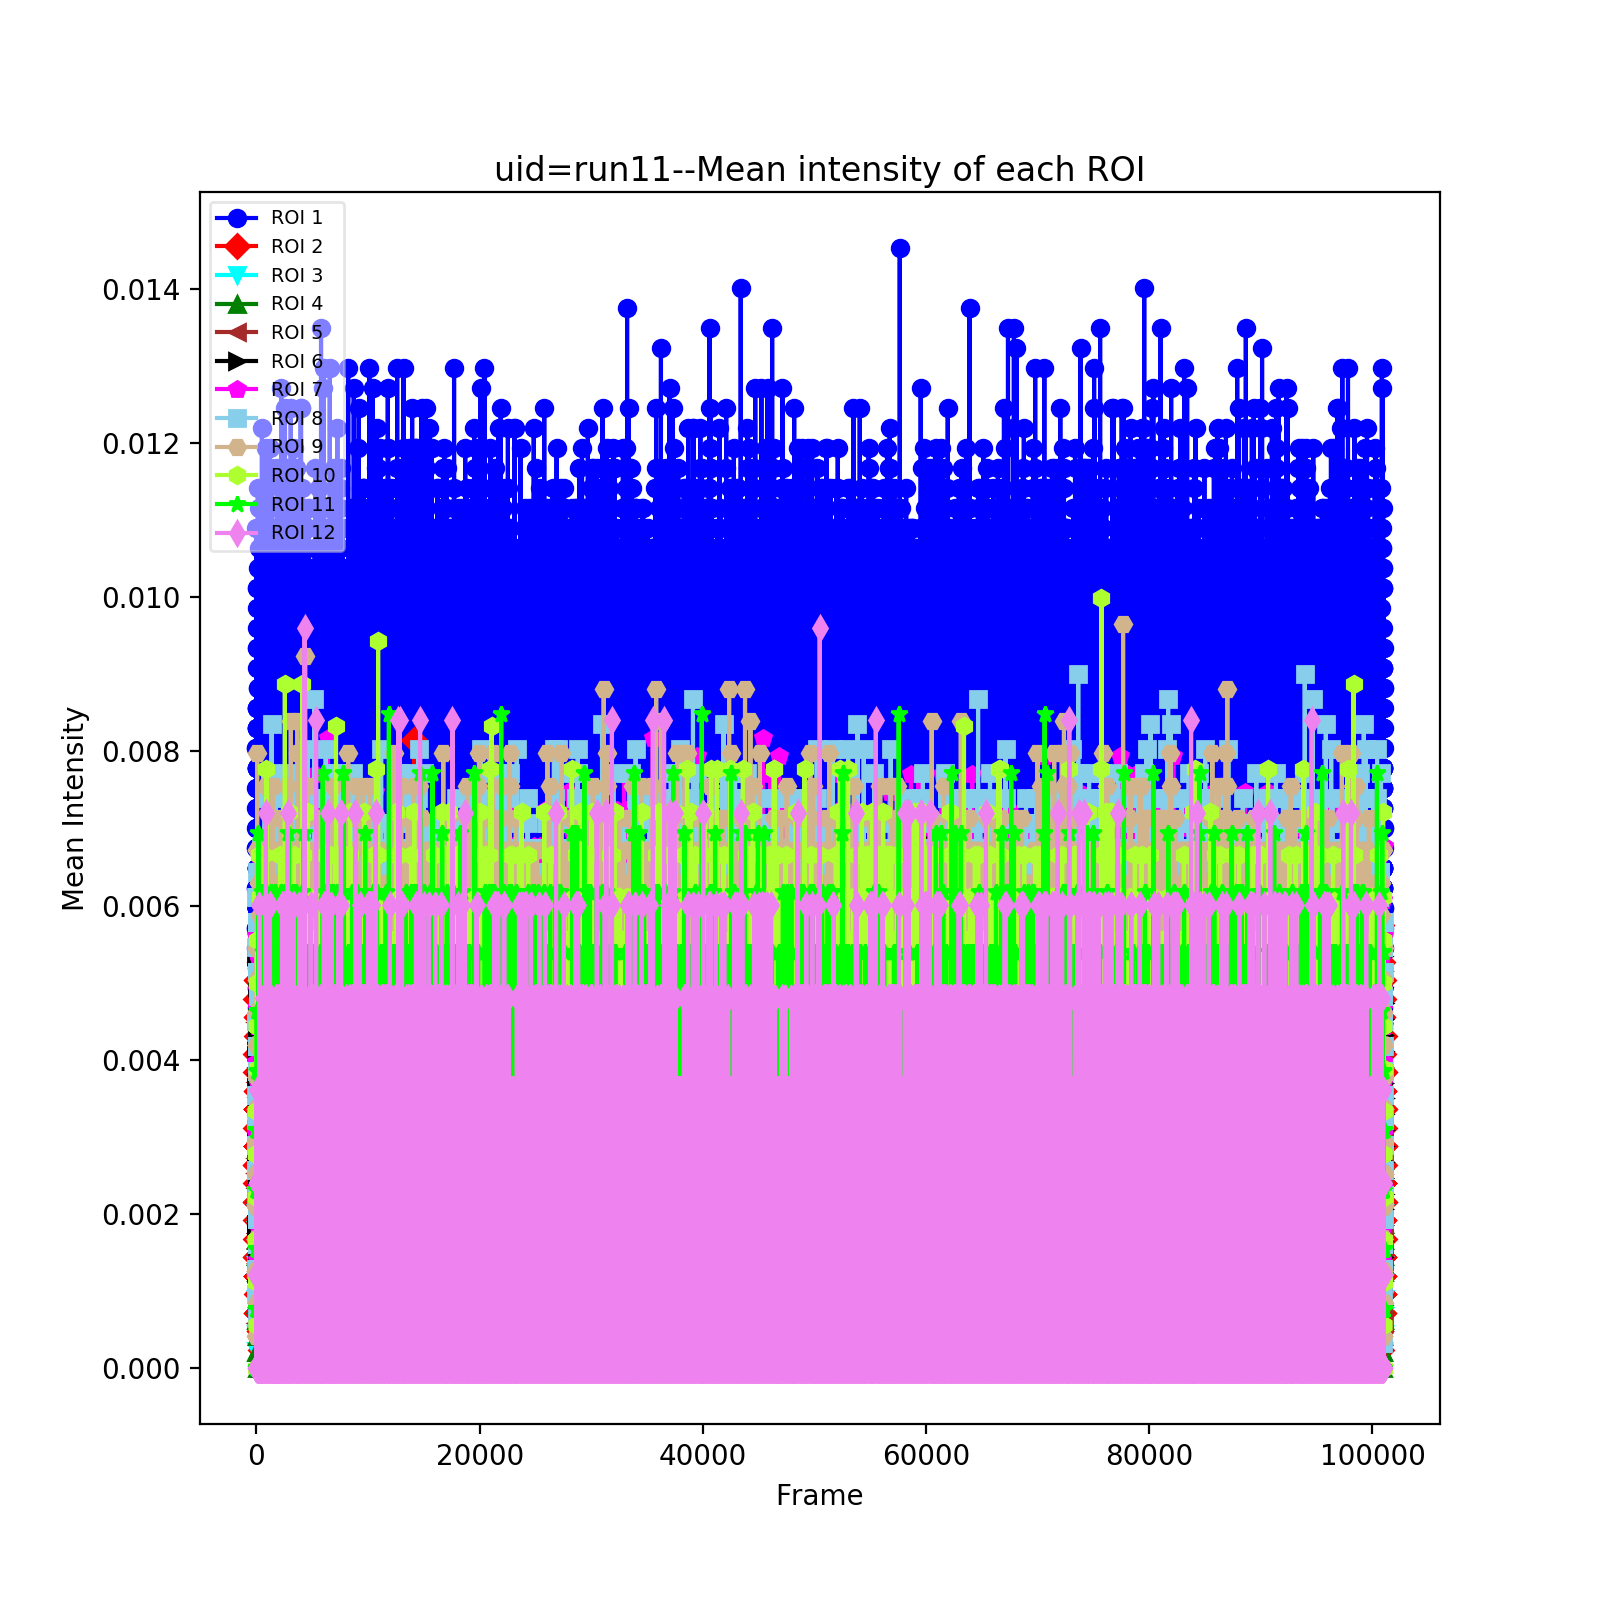

The file: uid=run11_t_ROIs is saved in /XF11ID/analysis/2017_3/Timepix/Results/run11/


In [995]:


ring_avg = None    
if run_t_ROI_Inten:
    times_roi, mean_int_sets = cal_each_ring_mean_intensityc(FD, roi_mask, timeperframe = None, multi_cor=True  ) 
    plot_each_ring_mean_intensityc( times_roi, mean_int_sets,  uid = uidstr, save=True, path= out_dir )
    roi_avg = np.average( mean_int_sets, axis=0)

# Do one time

In [996]:
if use_sqnorm:norm = get_pixelist_interp_iq( qp_saxs, iq_saxs, roi_mask, center)
else:norm=None 
if use_imgsum_norm:imgsum_ = imgsum
else:imgsum_ = None    
import time

In [997]:
if run_one_time: 
    t0 = time.time()    
    g2, lag_steps  = cal_g2p( FD,  roi_mask, bad_frame_list,good_start, num_buf = 8, num_lev= None,
                            imgsum= imgsum_, norm=norm )
    run_time(t0)

In this g2 calculation, the buf and lev number are: 8--15--
100999 frames will be processed...


  0%|          | 0/12 [00:00<?, ?it/s]

Starting assign the tasks...
Starting running the tasks...


100%|██████████| 12/12 [02:34<00:00, 12.88s/it]

G2 calculation DONE!
Total time: 2.715 min


In [998]:
lag_steps = lag_steps[:g2.shape[0]]
uid_ = uidstr + '_fra_%s_%s_tbins=%.2f_ms'%(FD.beg, FD.end,  tbins*1000 )
timeperframe  = tbins
print(uid_)

uid=run11_fra_0_100999_tbins=0.01_ms


In [999]:
if run_one_time:
    
    taus = lag_steps * timeperframe    
    try:
        g2_pds = save_g2_general( g2, taus=taus,qr= np.array( list( qval_dict.values() ) )[:,0],
                                            qz = np.array( list( qval_dict.values() ) )[:,1],
                             uid=uid_+'_g2.csv', path= out_dir, return_res=True )
    except:
        g2_pds = save_g2_general( g2, taus=taus,qr= np.array( list( qval_dict.values() ) )[:,0],                                             
                             uid=uid_+'_g2.csv', path= out_dir, return_res=True )

The correlation function is saved in /XF11ID/analysis/2017_3/Timepix/Results/run11/ with filename as uid=run11_fra_0_100999_tbins=0.01_ms_g2.csv


In [1000]:
if run_one_time:
    g2_fit_result, taus_fit, g2_fit = get_g2_fit_general( g2,  taus, 
                function = fit_g2_func,  vlim=[0.95, 1.05], fit_range= None,  
            fit_variables={'baseline':True, 'beta': True, 'alpha':False,'relaxation_rate':True},                                  
            guess_values={'baseline':1.0,'beta': 0.1,'alpha':1.0,'relaxation_rate':0.0100,},
            guess_limits = dict( baseline =[1, 1.8], alpha=[0, 2],
                        beta = [0, 1], relaxation_rate= [0.00001, 5000]) ) 
    g2_fit_paras = save_g2_fit_para_tocsv(g2_fit_result,  filename= uid_  +'_g2_fit_paras.csv', path= out_dir )

The g2 fitting parameters are saved in /XF11ID/analysis/2017_3/Timepix/Results/run11/uid=run11_fra_0_100999_tbins=0.01_ms_g2_fit_paras.csv


In [883]:
uid_

'uid=run11_fra_0_10099_tbins=0.10_ms'

In [1030]:
%matplotlib inline

/opt/conda_envs/analysis/lib/python3.5/site-packages/matplotlib/figure.py:1741: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


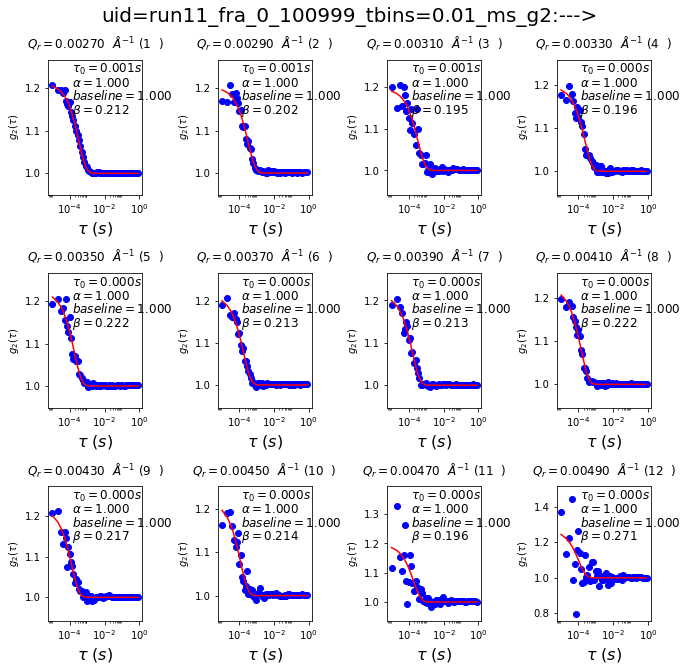

In [1031]:
if run_one_time:
    plot_g2_general( g2_dict={1:g2, 2:g2_fit}, taus_dict={1:taus, 2:taus_fit}, vlim=[0.95, 1.05],
                qval_dict = qval_dict, fit_res= g2_fit_result,  geometry= scat_geometry_,filename= uid_+'_g2', 
        path= out_dir, function= fit_g2_func,  ylabel='g2', append_name=  '_fit')

The fitted diffusion coefficient D0 is:  1.958e+08   A^2S-1


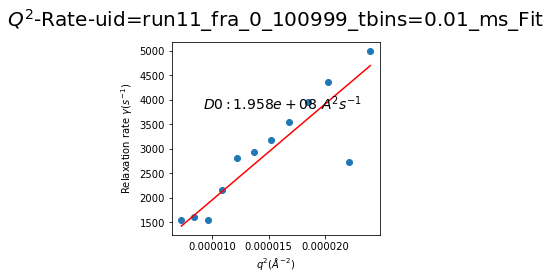

In [1033]:


if run_one_time:
    if False:
        fs, fe = 0, 9
        fs,fe=0, 12
        qval_dict_ = {k:qval_dict[k] for k in list(qval_dict.keys())[fs:fe]  }
        D0, qrate_fit_res = get_q_rate_fit_general(  qval_dict_, g2_fit_paras['relaxation_rate'][fs:fe], 
                                                   geometry=  scat_geometry_ )
        plot_q_rate_fit_general( qval_dict_, g2_fit_paras['relaxation_rate'][fs:fe],  qrate_fit_res, 
                                geometry= scat_geometry_,uid=uid_  , path= data_dir )
    else:
        D0, qrate_fit_res = get_q_rate_fit_general(  qval_dict, g2_fit_paras['relaxation_rate'],
                                    fit_range=[0, 26],   geometry= scat_geometry_ )    
        plot_q_rate_fit_general( qval_dict, g2_fit_paras['relaxation_rate'],  qrate_fit_res,   
                            geometry=  scat_geometry_,uid=uid_  ,
                                show_fit= True, path= data_dir, plot_all_range=False)



# Calculation of g2

In [1039]:
get_diffusion_coefficient(   8.9*1e-4, 125*1e-9, T=298)/1e8

1.9619966117121141

In [1018]:
g2_q1 = cal_particle_g2( radius=125*1e-9, viscosity=8.9*1e-4, qr=qr,  taus=taus, beta=0.214, T=298)

In [1019]:
qr

array([ 0.0027,  0.0029,  0.0031,  0.0033,  0.0035,  0.0037,  0.0039,
        0.0041,  0.0043,  0.0045,  0.0047,  0.0049])

In [1020]:
#taus

In [1021]:
g2.shape

(62, 12)

<IPython.core.display.Javascript object>


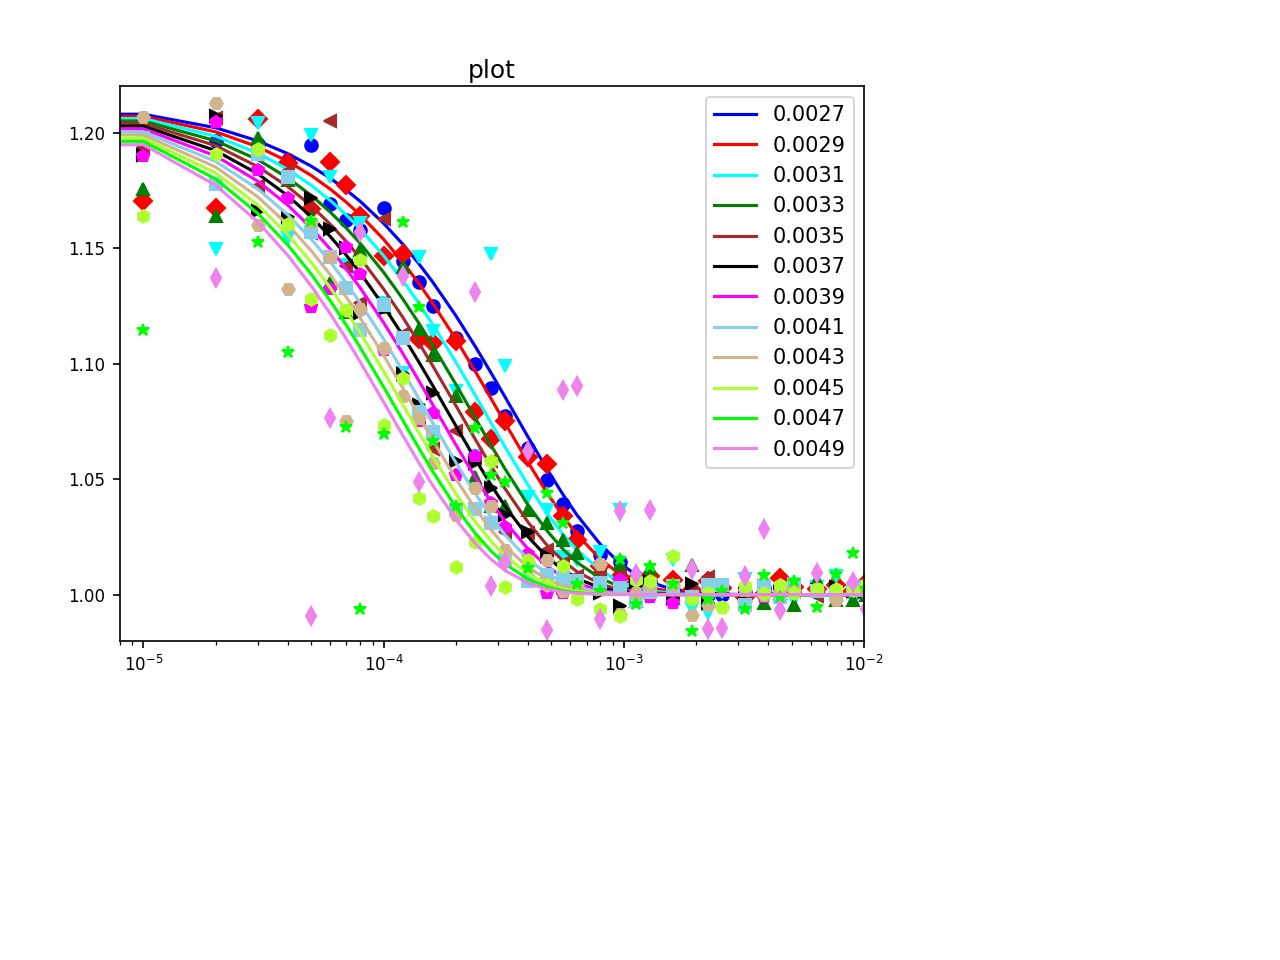

In [1022]:
fig, ax = plt.subplots()
for i, q1 in enumerate(qr):
    plot1D( x=taus, y= g2_q1[i],   ls='-', m='', logx=True, ax =ax, c=colors[i],  legend=qr[i])
    plot1D( x=taus[1:], y= g2[1:,i], m = markers[i], ls='', logx=True, xlim=[0.000008, 0.01], ylim=[0.98,1.22],
           ax =ax, c=colors[i],   legend= '')
    
        
    

# Two time

In [973]:
define_good_series = False
#define_good_series = True
if define_good_series:
    good_start = 5
    FD = Multifile(filename, beg = good_start, end = 1000)
    uid_ = uidstr + '_fra_%s_%s'%(FD.beg, FD.end)
    print( uid_ )

In [974]:
data_pixel = None
if run_two_time:    
    data_pixel =   Get_Pixel_Arrayc( FD, pixelist,  norm= norm ).get_data()

100%|██████████| 10099/10099 [00:06<00:00, 1568.46it/s]


In [975]:
import time
t0=time.time()
g12b=None
if run_two_time:     
    g12b = auto_two_Arrayc(  data_pixel,  roi_mask, index = None   )
    if run_dose:
        np.save( out_dir + 'uid=%s_g12b'%uid, g12b)
run_time( t0 )

100%|██████████| 12/12 [01:26<00:00,  5.97s/it]


Total time: 1.557 min


<IPython.core.display.Javascript object>


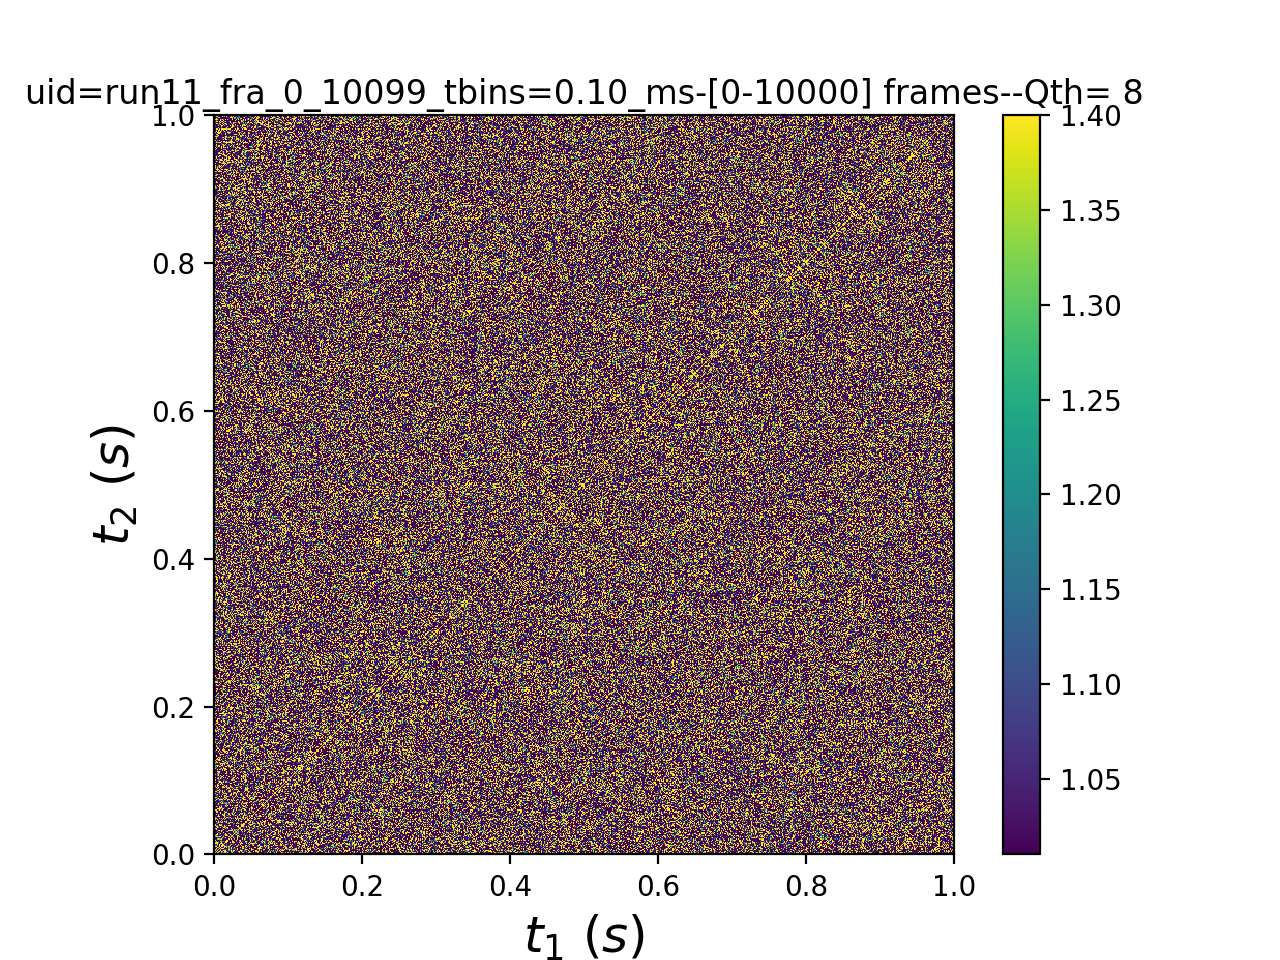

In [976]:
if run_two_time:
    show_C12(g12b, q_ind= 7, N1= FD.beg,logs=False, N2=min( FD.end,10000), vmin= 1.01, vmax=1.4, 
             timeperframe=timeperframe,save=True, path= out_dir, uid = uid_ )

In [977]:
multi_tau_steps = True
if run_two_time:
    if lag_steps is None:
        num_bufs=8
        noframes = FD.end - FD.beg
        num_levels = int(np.log( noframes/(num_bufs-1))/np.log(2) +1) +1
        tot_channels, lag_steps, dict_lag = multi_tau_lags(num_levels, num_bufs)
        max_taus= lag_steps.max()
        
    #max_taus= lag_steps.max()  
    max_taus = Nimg    
    t0=time.time()
    #tausb = np.arange( g2b.shape[0])[:max_taus] *timeperframe
    if multi_tau_steps:
        lag_steps_ = lag_steps[   lag_steps <= g12b.shape[0] ]
        g2b = get_one_time_from_two_time(g12b)[lag_steps_]
        tausb = lag_steps_ *timeperframe
    else:
        tausb = (np.arange( g12b.shape[0]) *timeperframe)[:-200]
        g2b = (get_one_time_from_two_time(g12b))[:-200]
    run_time(t0)
         
    g2b_pds = save_g2_general( g2b, taus=tausb, qr= np.array( list( qval_dict.values() ) )[:,0],
                              qz=None, uid=uid_ +'_g2b.csv', path= out_dir, return_res=True )

Total time: 6.332 sec
The correlation function is saved in /XF11ID/analysis/2017_3/Timepix/Results/run11/ with filename as uid=run11_fra_0_10099_tbins=0.10_ms_g2b.csv


In [978]:
if run_two_time:    
    g2b_fit_result, tausb_fit, g2b_fit = get_g2_fit_general( g2b,  tausb, 
                function = fit_g2_func,  vlim=[0.95, 1.05], fit_range= None,  
            fit_variables={'baseline':False, 'beta': True, 'alpha':False,'relaxation_rate':True},                                  
            guess_values={'baseline':1.0,'beta': 0.15,'alpha':1.0,'relaxation_rate':1,},
            guess_limits = dict( baseline =[1, 1.8], alpha=[0, 2],
                        beta = [0, 1], relaxation_rate= [0.000001, 5000]) ) 
    g2b_fit_paras = save_g2_fit_para_tocsv(g2b_fit_result,  filename= uid_  +'_g2b_fit_paras.csv', path= out_dir )

The g2 fitting parameters are saved in /XF11ID/analysis/2017_3/Timepix/Results/run11/uid=run11_fra_0_10099_tbins=0.10_ms_g2b_fit_paras.csv


<IPython.core.display.Javascript object>


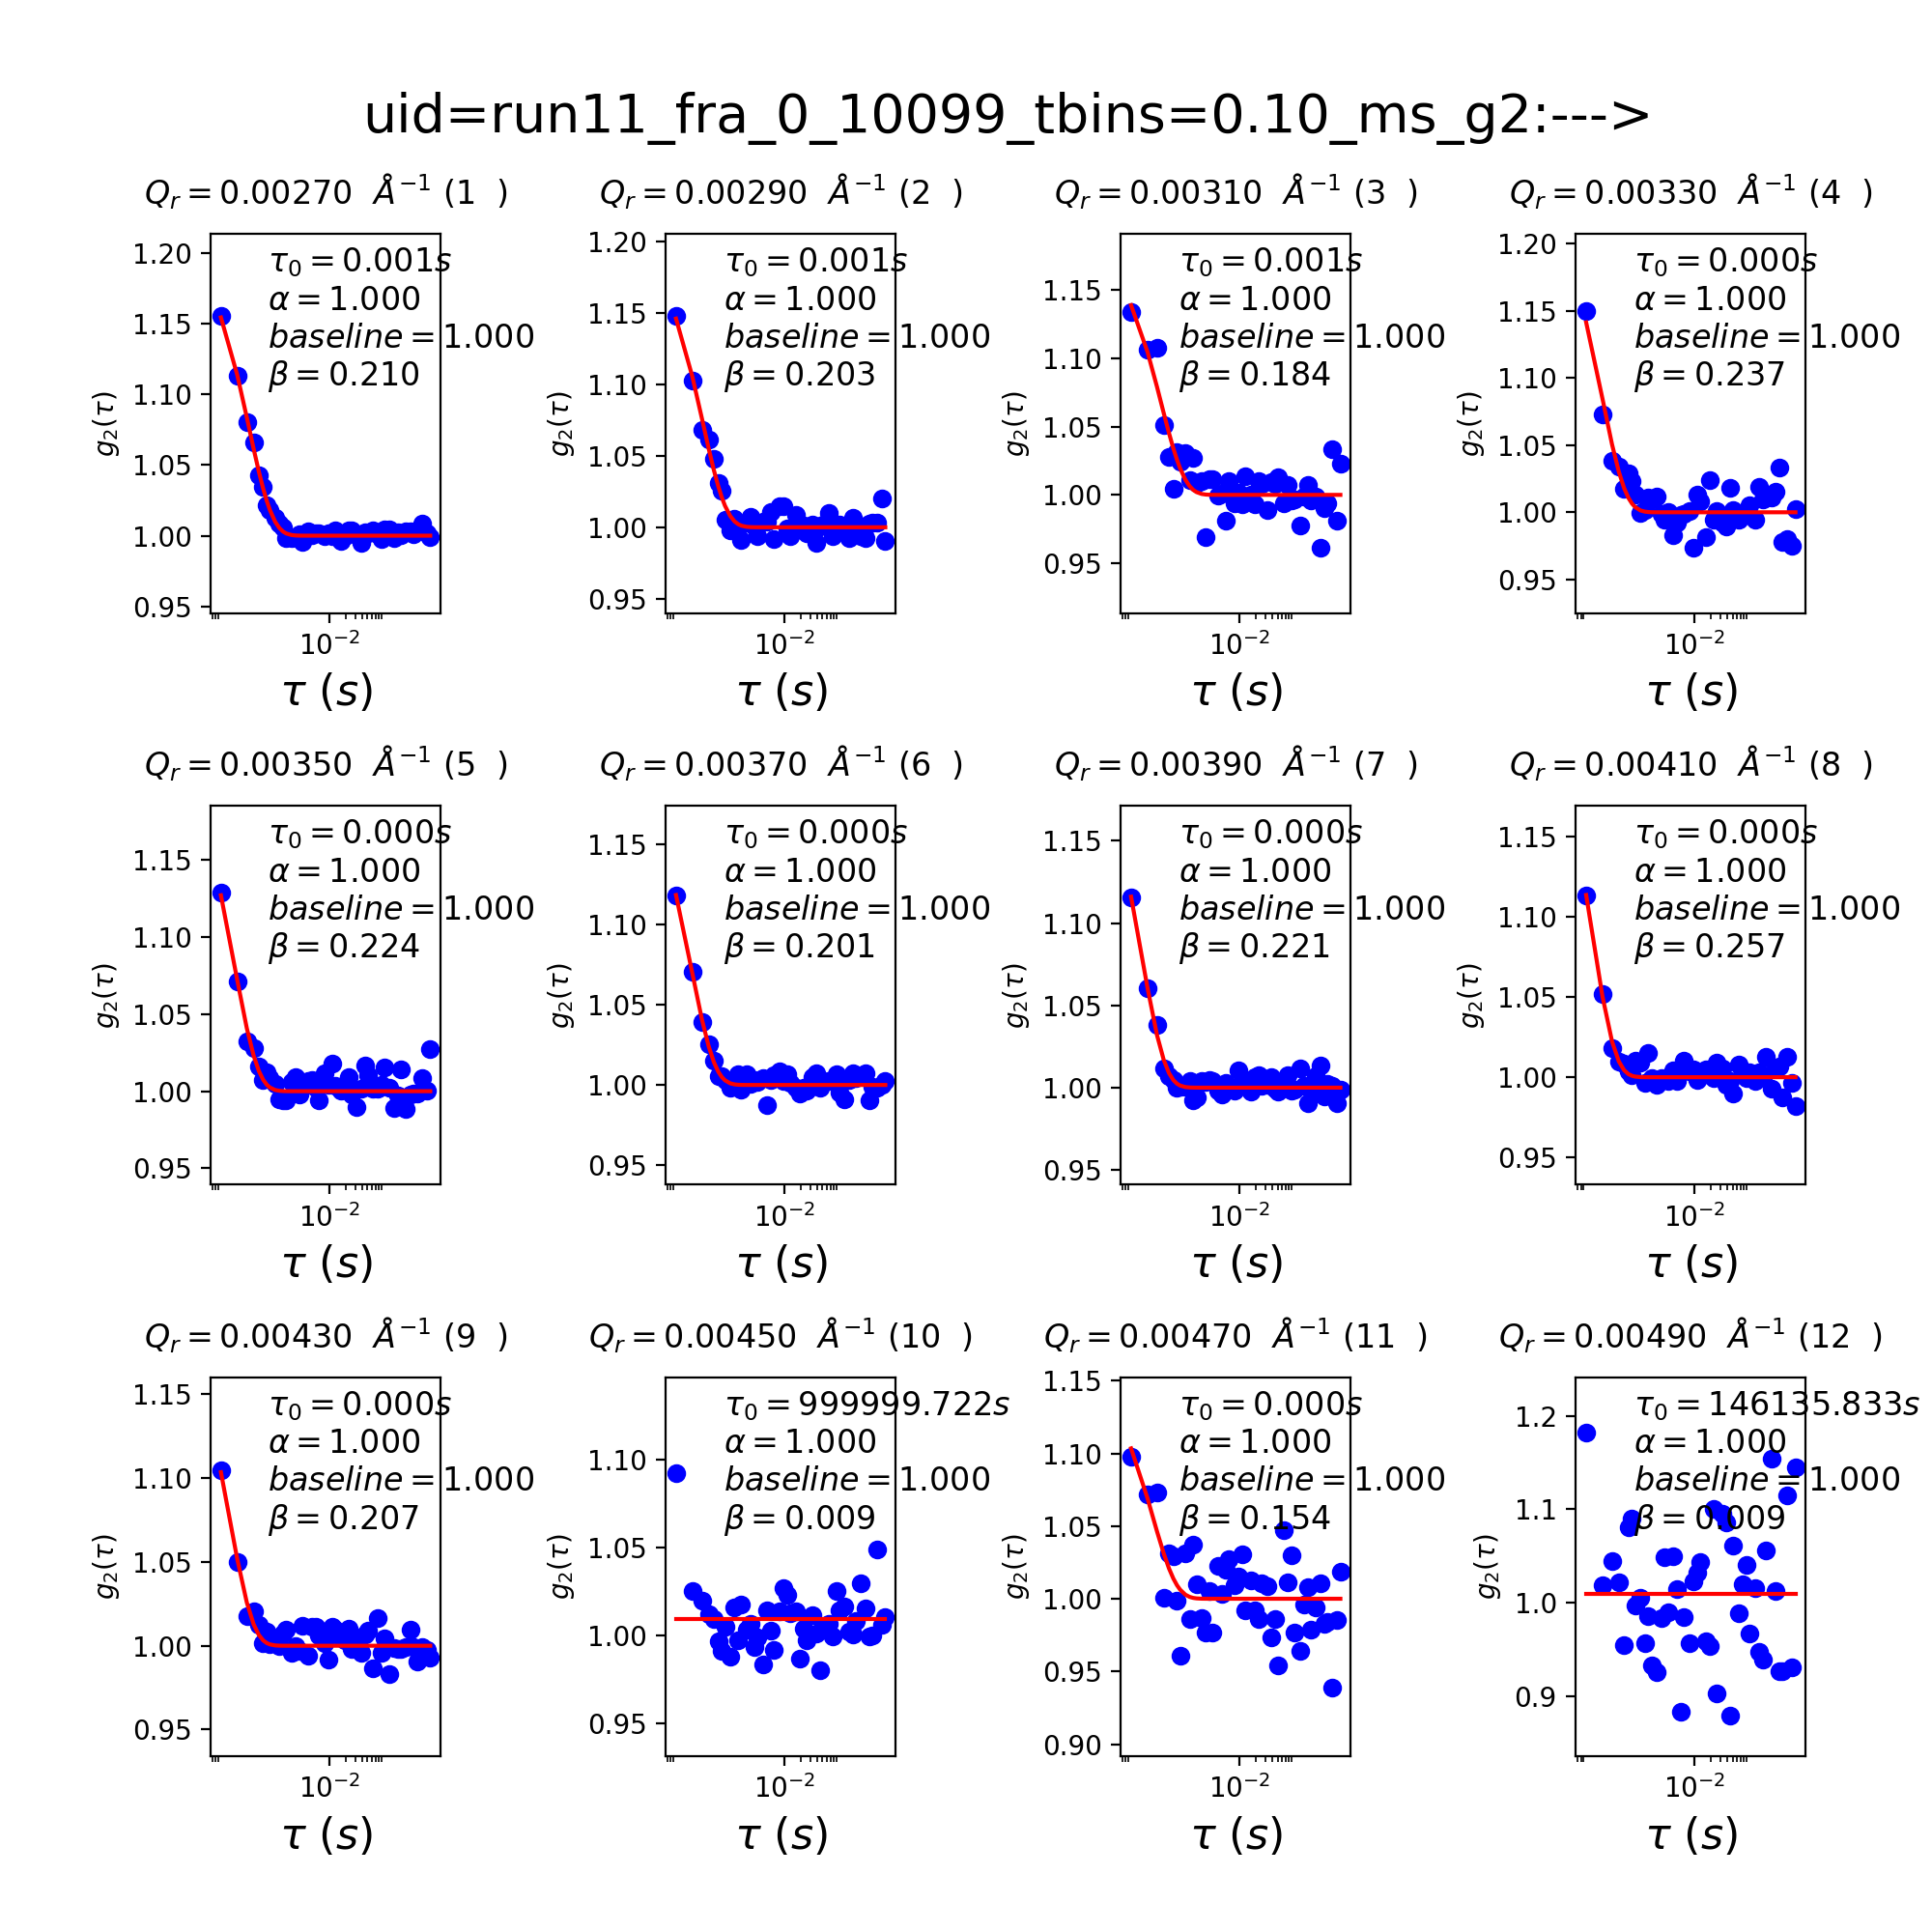

In [979]:
if run_two_time:
    plot_g2_general( g2_dict={1:g2b, 2:g2b_fit}, taus_dict={1:tausb, 2:tausb_fit}, vlim=[0.95, 1.05],
                qval_dict=qval_dict, fit_res= g2b_fit_result,  geometry=scat_geometry_,filename=uid_+'_g2', 
                    path= out_dir, function= fit_g2_func,  ylabel='g2', append_name=  '_b_fit')

The fitted diffusion coefficient D0 is:  1.635e+08   A^2S-1


<IPython.core.display.Javascript object>


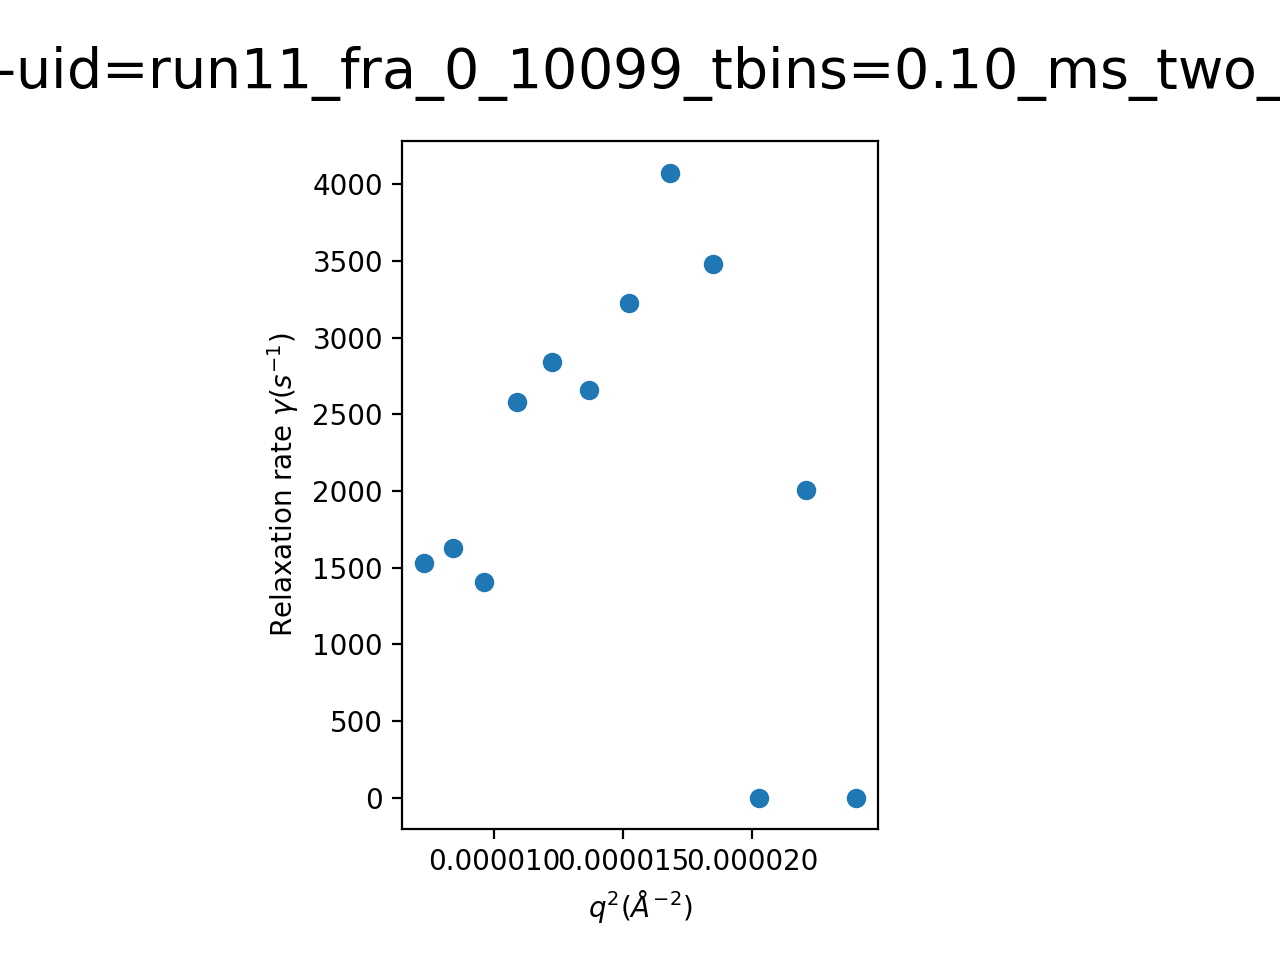

In [980]:
if run_two_time:    
    if False:
        fs, fe = 0,9
        fs, fe = 0,12
        qval_dict_ = {k:qval_dict[k] for k in list(qval_dict.keys())[fs:fe]  }
        D0b, qrate_fit_resb = get_q_rate_fit_general(  qval_dict_, g2b_fit_paras['relaxation_rate'][fs:fe], geometry= scat_geometry_ )
        plot_q_rate_fit_general( qval_dict_, g2b_fit_paras['relaxation_rate'][fs:fe],  qrate_fit_resb, 
                            geometry= scat_geometry_,uid=uid_ +'_two_time' , path= out_dir )
    else:
    
        D0b, qrate_fit_resb = get_q_rate_fit_general(  qval_dict, g2b_fit_paras['relaxation_rate'],
                                        fit_range=[1, 10],  geometry= scat_geometry_ )
        plot_q_rate_fit_general( qval_dict, g2b_fit_paras['relaxation_rate'],  qrate_fit_resb,   
                            geometry= scat_geometry_,uid=uid_ +'_two_time', show_fit=False,path= out_dir, plot_all_range= True )

<IPython.core.display.Javascript object>


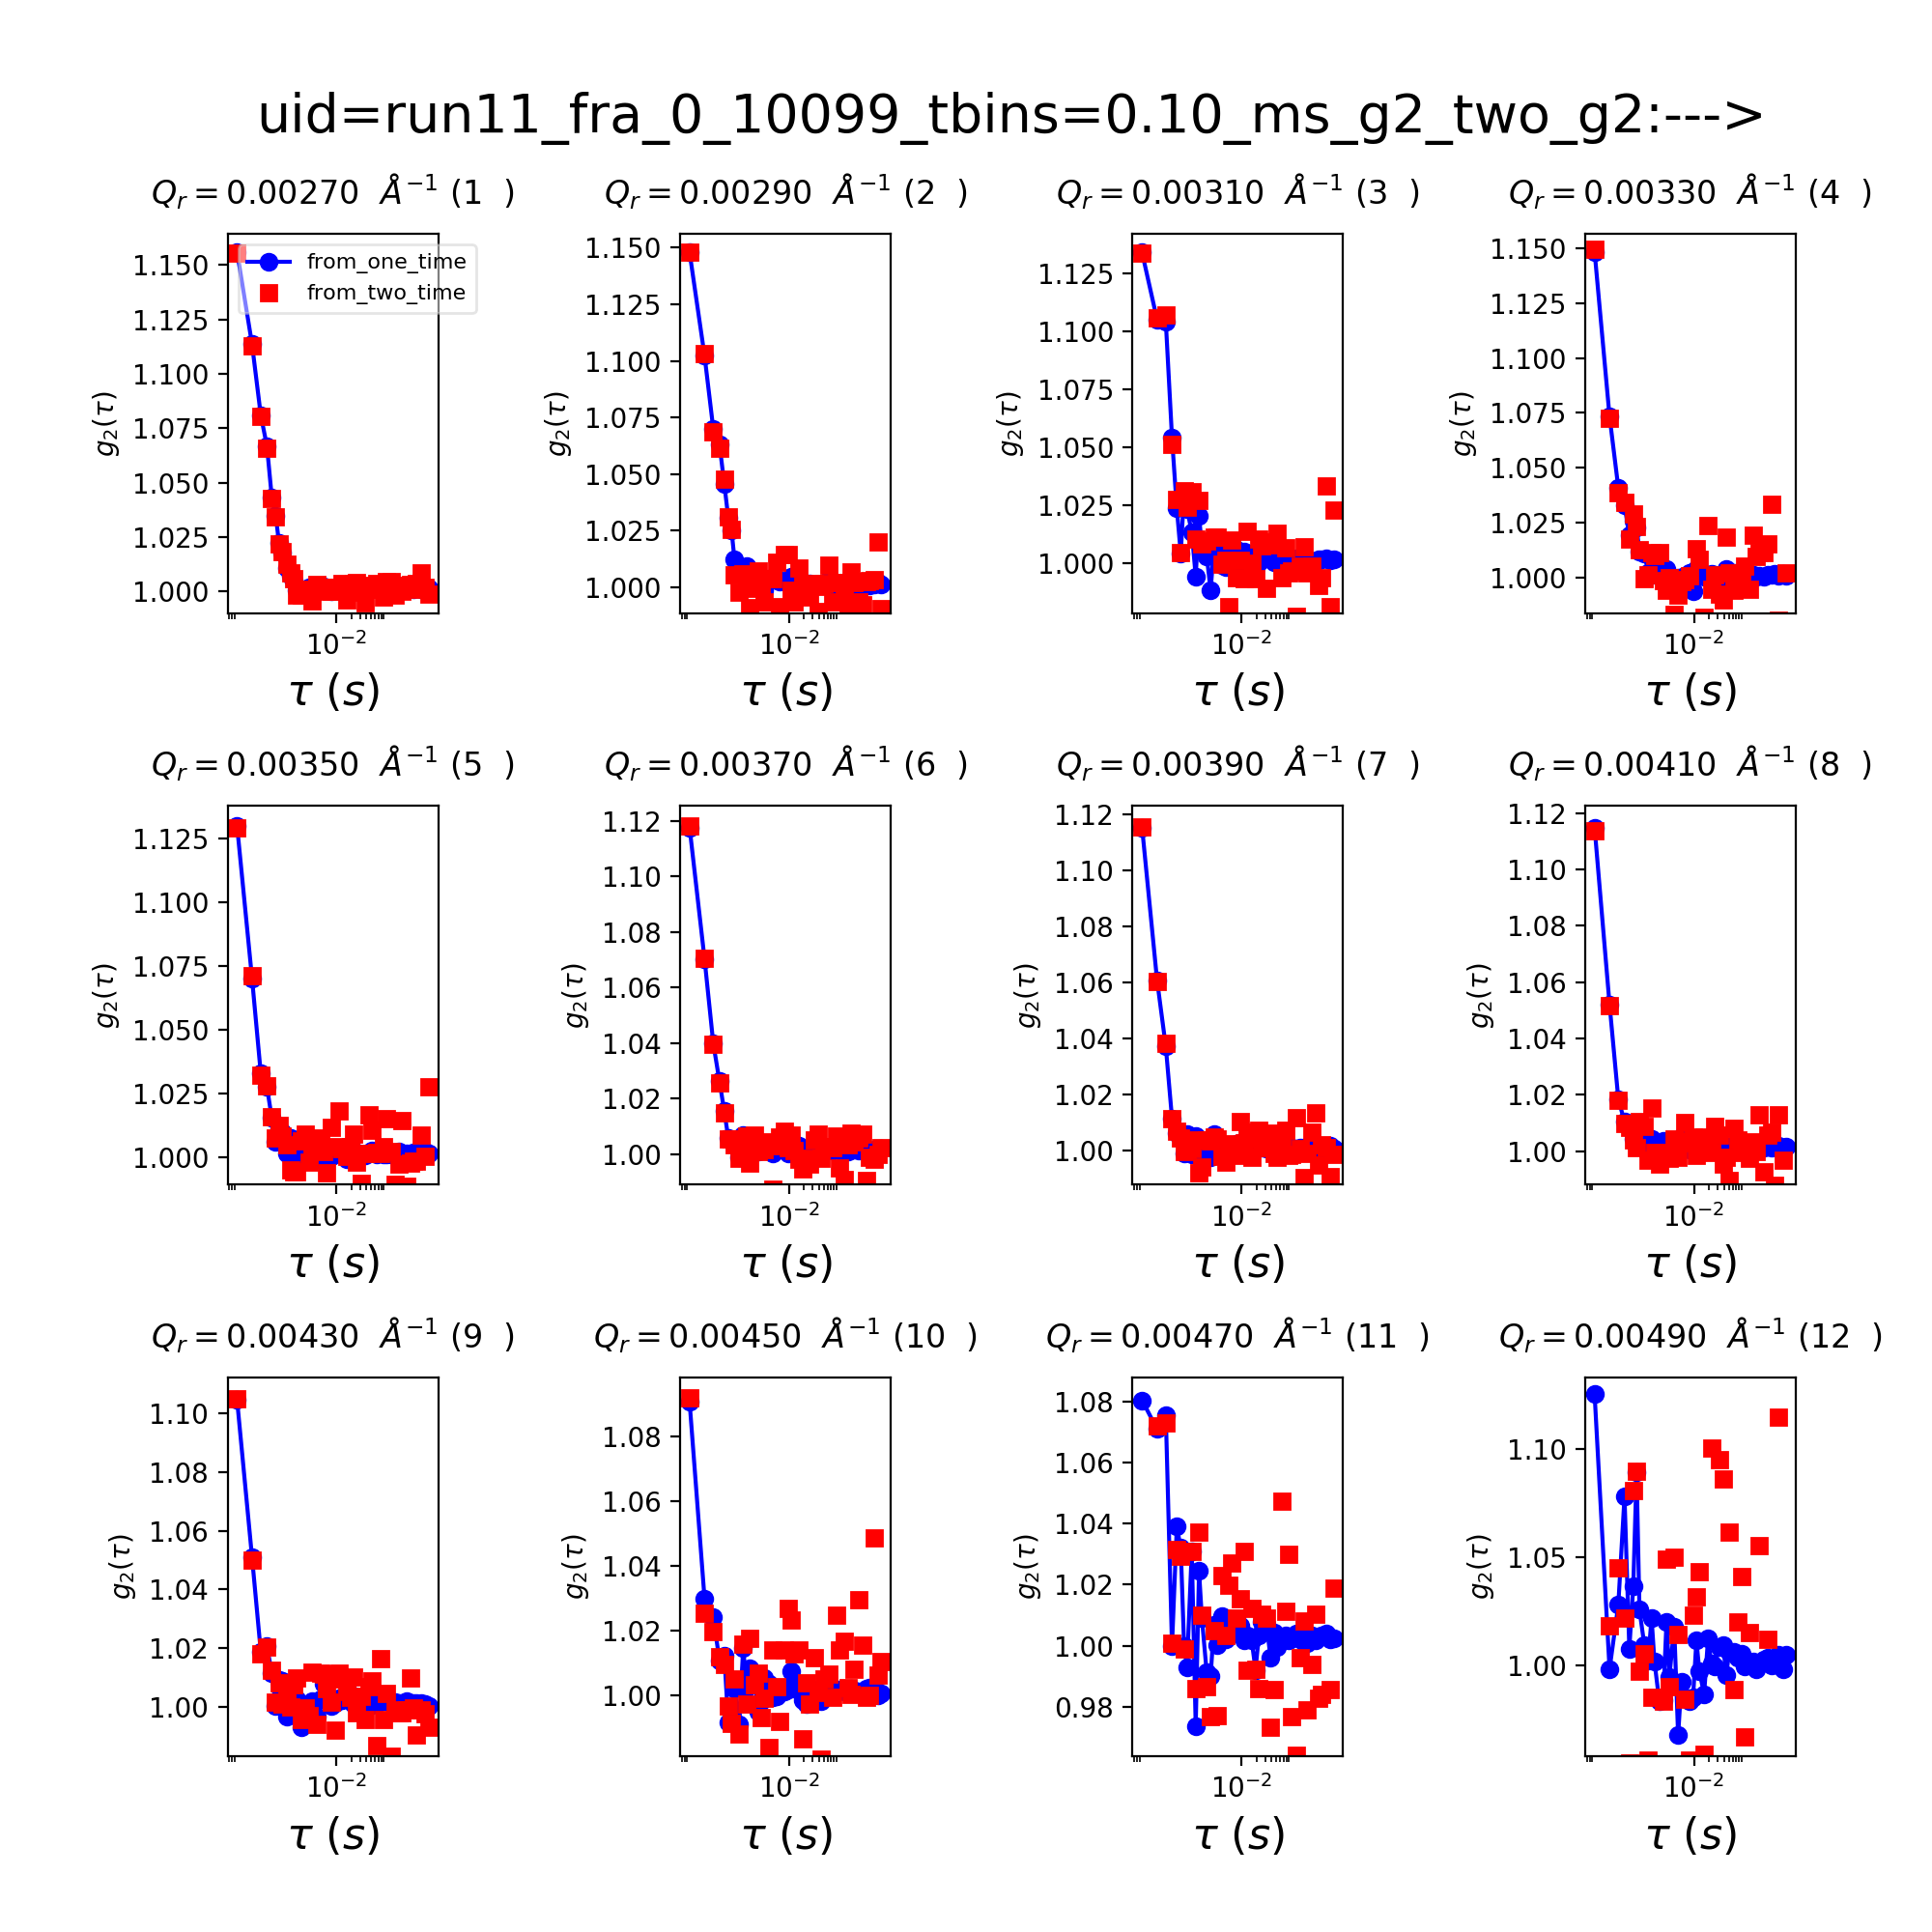

In [981]:
if run_two_time and run_one_time:
    plot_g2_general( g2_dict={1:g2, 2:g2b}, taus_dict={1:taus, 2:tausb},vlim=[0.99, 1.007],
                qval_dict=qval_dict, g2_labels=['from_one_time', 'from_two_time'],
            geometry=scat_geometry_,filename=uid_+'_g2_two_g2', path= out_dir, ylabel='g2', )